# <font size="65">Benchmarking Robust Classification under Data Imbalance</font>

Trabalho realizado por:

* Afonso Coelho (FCUP_IACD:202305085)  
* Diogo Amaral (FCUP_IACD:202305187)  
* Miguel Carvalho (FCUP_IACD:202305229)  

<div style="padding: 10px;padding-left:5%">
<img src="fotos_md/Cienciasporto.png" style="float:left; height:75px;width:200px">
<img src="fotos_md/Feuporto.png" style="float:left ; height:75px; padding-left:20px;width:200px">
</div>

<div style="clear:both;"></div>

******

## Projeto

Este projeto insere-se na unidade curricular de *Machine Learning I (CC2008)* e tem como objetivo aprofundar a compreensão teórica e prática de algoritmos de classificação supervisionada, aplicando-os em cenários com características desafiantes nos dados.  

Em particular, a nossa abordagem foca-se na **classificação binária com dados desbalanceados**, uma situação comum em domínios médicos, financeiros e industriais, onde uma das classes é significativamente mais rara do que a outra.  

Partimos de uma implementação base de um algoritmo clássico de classificação, que modificamos para lidar melhor com este tipo de desbalanceamento. O desempenho do modelo original e do modelo modificado será comparado em vários conjuntos de dados de benchmark, com o objetivo de validar empiricamente a eficácia das alterações propostas.  

O projeto decorre em duas fases:
- **Fase 1**: Análise e avaliação da versão original do algoritmo.
- **Fase 2**: Proposta e teste de uma versão modificada, mais robusta ao desbalanceamento.

Todos os algoritmos são implementados **de raiz**, sem recurso a bibliotecas de alto nível como `scikit-learn`, respeitando os requisitos do enunciado.




In [1]:
import logging

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mla.metrics.metrics import mean_squared_error
from mla.neuralnet import NeuralNet
from mla.neuralnet.constraints import MaxNorm
from mla.neuralnet.layers import Activation, Dense, Dropout
from mla.neuralnet.optimizers import Adadelta, Adam,RMSprop
from mla.neuralnet.parameters import Parameters
from mla.neuralnet.regularizers import L2
from mla.utils import one_hot
import pandas as pd
import os
import numpy as np
import importlib

In [2]:
def setupx_y(dataset_path):
    data = pd.read_csv(dataset_path)
    
    # Supondo que o dataset tenha colunas 'features' e 'target'
    X = data.iloc[:, :-1].values  # Todas as colunas menos a última como features
    y = data.iloc[:, -1].values   # Última coluna como target

    values, counts = np.unique(y, return_counts=True)
    majority_ratio = counts.max() / counts.sum()

    if len(values) != 2:
        raise ValueError("A coluna target não é binária")

    if majority_ratio <= 0.6:
        raise ValueError("Nenhuma classe é majoritária (>60%)")

    majority_class = values[np.argmax(counts)]
    minority_class = values[np.argmin(counts)]

    # Re-encode: majority -> 0, minority -> 1
    y = np.where(y == majority_class, 0, 1)

    print(dataset_path)
    # Count the occurrences of 0's and 1's in the target column
    count_zeros = np.sum(y == 0)
    count_ones = np.sum(y == 1)
    print(f"Count of 0's: {count_zeros}, Count of 1's: {count_ones}")


    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    
    y = one_hot(y)
    return X, y, count_zeros, count_ones
    
def classification(dataset_path):

    # Carregar o dataset
    X, y, count_zeros, count_ones = setupx_y(dataset_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1111)

    model = NeuralNet(
        layers=[
        Dense(128,Parameters(init="uniform")),
        Activation("relu"),
        Dense(64,Parameters(init="uniform")),
        Activation("relu"),
        Dense(2),
        Activation("sigmoid"),
    ],
        loss="binary_crossentropy",
        testarerros=True,
        zeros=count_zeros,
        uns=count_ones,
        optimizer=Adam(),
        metric="f1score",
    )
    model.X_test = X_test
    model.y_test = y_test
    model.fit(X_train, y_train,X_test,y_test)
    return model

cwd = os.getcwd()  # Obtém o diretório atual
dataset_dir = os.path.join(cwd, "class_imbalance\class_imbalance")  # Caminho relativo corrigido
modelos=[]
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        dataset_path = os.path.join(dataset_dir, filename)
        try:
            modelos.append(classification(dataset_path))
        except TypeError as e:
            continue

d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1000_hypothyroid.csv
Count of 0's: 3481, Count of 1's: 291


  0%|          | 0/51 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1002_ipums_la_98-small.csv
Count of 0's: 6694, Count of 1's: 791


  0%|          | 0/100 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1004_synthetic_control.csv
Count of 0's: 500, Count of 1's: 100


100%|██████████| 8/8 [00:00<00:00, 541.18it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1013_analcatdata_challenger.csv
Count of 0's: 129, Count of 1's: 9


100%|██████████| 2/2 [00:00<00:00, 788.40it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1014_analcatdata_dmft.csv
Count of 0's: 642, Count of 1's: 155


  0%|          | 0/11 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1016_vowel.csv
Count of 0's: 900, Count of 1's: 90


  0%|          | 0/14 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1018_ipums_la_99-small.csv
Count of 0's: 8276, Count of 1's: 568


  0%|          | 0/118 [00:00<?, ?it/s]

d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1020_mfeat-karhunen.csv
Count of 0's: 1800, Count of 1's: 200



100%|██████████| 27/27 [00:00<00:00, 698.00it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1021_page-blocks.csv
Count of 0's: 4913, Count of 1's: 560


100%|██████████| 73/73 [00:00<00:00, 896.28it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1022_mfeat-pixel.csv
Count of 0's: 1800, Count of 1's: 200


100%|██████████| 27/27 [00:00<00:00, 616.17it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1023_soybean.csv
Count of 0's: 591, Count of 1's: 92


  0%|          | 0/10 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1039_hiva_agnostic.csv
Count of 0's: 4080, Count of 1's: 149


100%|██████████| 57/57 [00:00<00:00, 193.03it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1045_kc1-top5.csv
Count of 0's: 137, Count of 1's: 8


100%|██████████| 2/2 [00:00<00:00, 782.01it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1049_pc4.csv
Count of 0's: 1280, Count of 1's: 178


100%|██████████| 20/20 [00:00<00:00, 726.74it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1050_pc3.csv
Count of 0's: 1403, Count of 1's: 160


100%|██████████| 21/21 [00:00<00:00, 654.90it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1056_mc1.csv
Count of 0's: 9398, Count of 1's: 68


100%|██████████| 126/126 [00:00<00:00, 750.34it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1059_ar1.csv
Count of 0's: 112, Count of 1's: 9


100%|██████████| 2/2 [00:00<00:00, 773.71it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1061_ar4.csv
Count of 0's: 87, Count of 1's: 20


100%|██████████| 2/2 [00:00<00:00, 980.32it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1064_ar6.csv
Count of 0's: 86, Count of 1's: 15


100%|██████████| 2/2 [00:00<00:00, 978.72it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_1065_kc3.csv
Count of 0's: 415, Count of 1's: 43


100%|██████████| 7/7 [00:00<00:00, 687.57it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_311_oil_spill.csv
Count of 0's: 896, Count of 1's: 41


100%|██████████| 13/13 [00:00<00:00, 728.01it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_312_scene.csv
Count of 0's: 1976, Count of 1's: 431


100%|██████████| 32/32 [00:00<00:00, 581.90it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_316_yeast_ml8.csv
Count of 0's: 2383, Count of 1's: 34


100%|██████████| 33/33 [00:00<00:00, 719.88it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_38_sick.csv
Count of 0's: 3541, Count of 1's: 231


  0%|          | 0/51 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_450_analcatdata_lawsuit.csv
Count of 0's: 245, Count of 1's: 19


100%|██████████| 4/4 [00:00<00:00, 870.19it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_463_backache.csv
Count of 0's: 155, Count of 1's: 25


100%|██████████| 3/3 [00:00<00:00, 984.42it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_757_meta.csv
Count of 0's: 474, Count of 1's: 54


  0%|          | 0/7 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_764_analcatdata_apnea3.csv
Count of 0's: 395, Count of 1's: 55


  0%|          | 0/6 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_765_analcatdata_apnea2.csv
Count of 0's: 411, Count of 1's: 64


  0%|          | 0/7 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_767_analcatdata_apnea1.csv
Count of 0's: 414, Count of 1's: 61


  0%|          | 0/7 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_865_analcatdata_neavote.csv
Count of 0's: 93, Count of 1's: 7


  0%|          | 0/2 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_867_visualizing_livestock.csv
Count of 0's: 105, Count of 1's: 25


  0%|          | 0/2 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_875_analcatdata_chlamydia.csv
Count of 0's: 81, Count of 1's: 19


  0%|          | 0/2 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_940_water-treatment.csv
Count of 0's: 447, Count of 1's: 80


100%|██████████| 7/7 [00:00<00:00, 653.23it/s]

d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_947_arsenic-male-bladder.csv
Count of 0's: 535, Count of 1's: 24



100%|██████████| 8/8 [00:00<00:00, 922.76it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_949_arsenic-female-bladder.csv
Count of 0's: 479, Count of 1's: 80


100%|██████████| 8/8 [00:00<00:00, 922.89it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_950_arsenic-female-lung.csv
Count of 0's: 540, Count of 1's: 19


100%|██████████| 8/8 [00:00<00:00, 921.75it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_951_arsenic-male-lung.csv
Count of 0's: 546, Count of 1's: 13


100%|██████████| 8/8 [00:00<00:00, 922.13it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_954_spectrometer.csv
Count of 0's: 476, Count of 1's: 55


100%|██████████| 8/8 [00:00<00:00, 712.15it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_958_segment.csv
Count of 0's: 1980, Count of 1's: 330


100%|██████████| 31/31 [00:00<00:00, 893.15it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_962_mfeat-morphological.csv
Count of 0's: 1800, Count of 1's: 200


100%|██████████| 27/27 [00:00<00:00, 913.14it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_966_analcatdata_halloffame.csv
Count of 0's: 1215, Count of 1's: 125


  0%|          | 0/18 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_968_analcatdata_birthday.csv
Count of 0's: 312, Count of 1's: 53


  0%|          | 0/5 [00:00<?, ?it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_971_mfeat-fourier.csv
Count of 0's: 1800, Count of 1's: 200


100%|██████████| 27/27 [00:00<00:00, 698.51it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_976_JapaneseVowels.csv
Count of 0's: 8347, Count of 1's: 1614


100%|██████████| 133/133 [00:00<00:00, 936.27it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_978_mfeat-factors.csv
Count of 0's: 1800, Count of 1's: 200


100%|██████████| 27/27 [00:00<00:00, 518.57it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_980_optdigits.csv
Count of 0's: 5048, Count of 1's: 572


100%|██████████| 75/75 [00:00<00:00, 718.39it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_984_analcatdata_draft.csv
Count of 0's: 334, Count of 1's: 32


100%|██████████| 5/5 [00:00<00:00, 819.07it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_987_collins.csv
Count of 0's: 420, Count of 1's: 80


100%|██████████| 7/7 [00:00<00:00, 855.83it/s]


d:\JuniorAI\Benchmarking-ML-Algorithms-\class_imbalance\class_imbalance\dataset_995_mfeat-zernike.csv
Count of 0's: 1800, Count of 1's: 200


100%|██████████| 27/27 [00:00<00:00, 687.88it/s]


In [36]:
def plot_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)
    #display(predictions)

    plt.figure(figsize=(10, 6))

    plt.scatter(range(len(predictions)), predictions[:, 0], label="Predição Classe 0", alpha=0.7, color="blue")
    plt.scatter(range(len(predictions)), predictions[:, 1], label="Predição Classe 1", alpha=0.7, color="orange")
    plt.scatter(range(len(y_test)), y_test[:, 0], label="Valor Real (Classe 0 ou 1)", alpha=0.7, color="green", marker="x")

    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.title("Predições e Valores Reais das Classes")
    plt.legend()
    plt.grid()
    plt.show()

def plot_metric(model):
    metric = model.error_list  # A lista de erros deve estar salva no modelo

    train_metric = [e[0] for e in metric]
    test_metric = [e[1] for e in metric]
    indices = list(range(len(metric)))

    plt.figure(figsize=(10, 6))
    plt.plot(indices, train_metric, label="Metrica Treino", marker="o")
    plt.plot(indices, test_metric, label="Metrica Teste", marker="x")
    plt.xlabel("Época")
    plt.ylabel("Metrica")
    plt.title("Métrica de Treino e Teste em Função da Época")
    plt.legend()
    plt.grid()
    plt.ylim(0, 1)
    plt.show()

def plot_roc_curve(model, X_test, y_test):
    predictions = model.predict(X_test)
    auc_score = roc_auc_score(y_test[:, 0], predictions[:, 0])
    print("Roc Score Area under the curve:", auc_score)

    fpr, tpr, thresholds = roc_curve(y_test[:, 0], predictions[:, 0])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


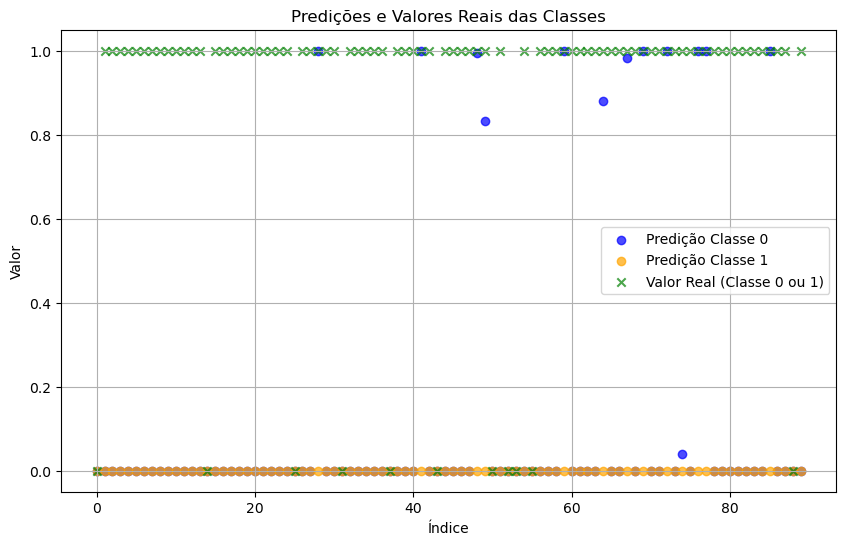

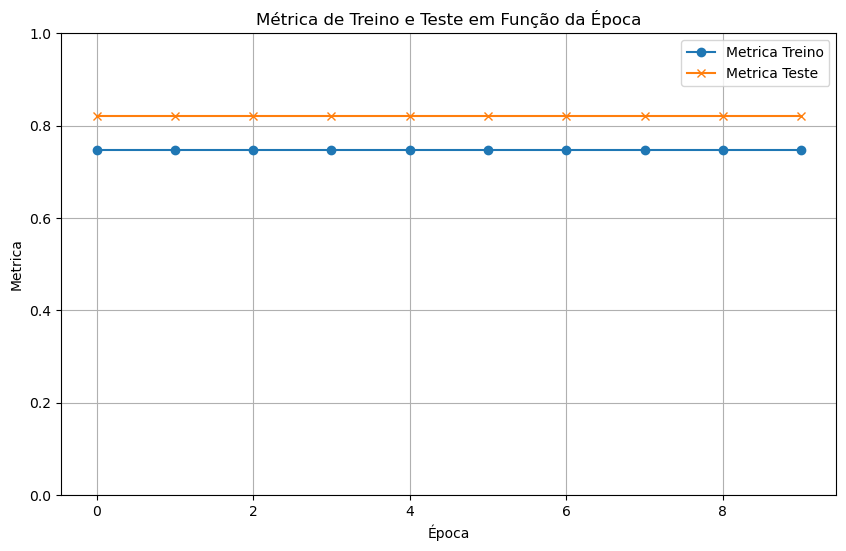

Roc Score Area under the curve: 0.9988492520138089


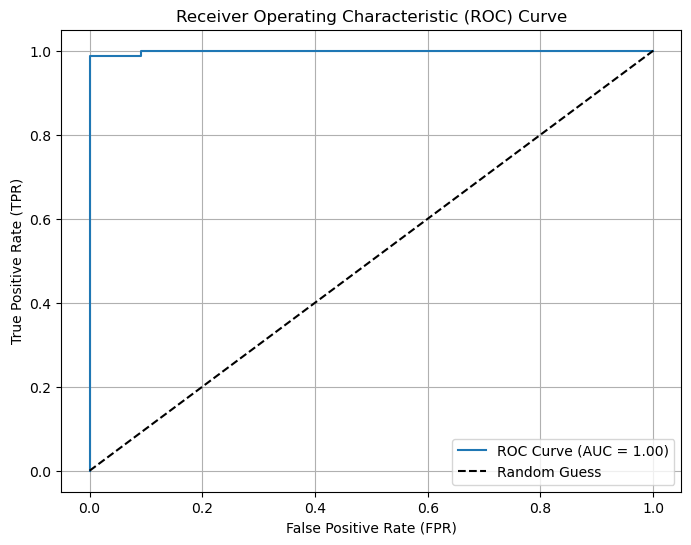

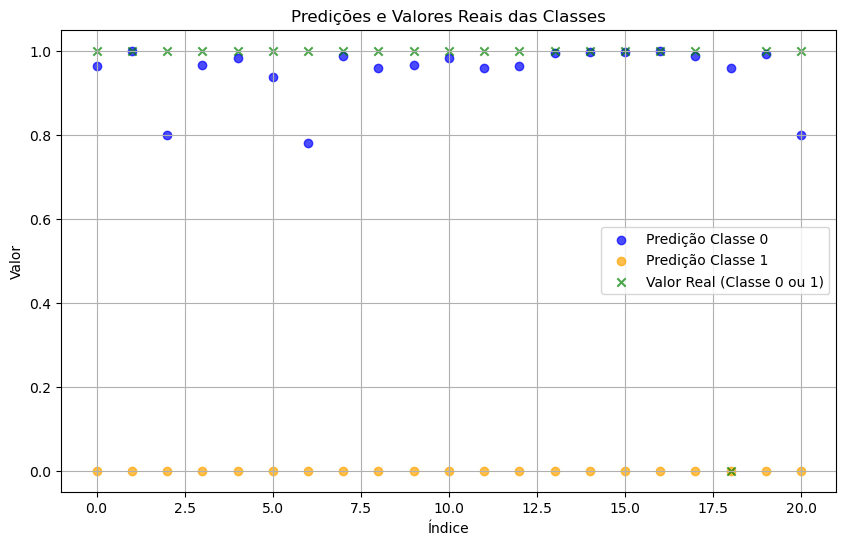

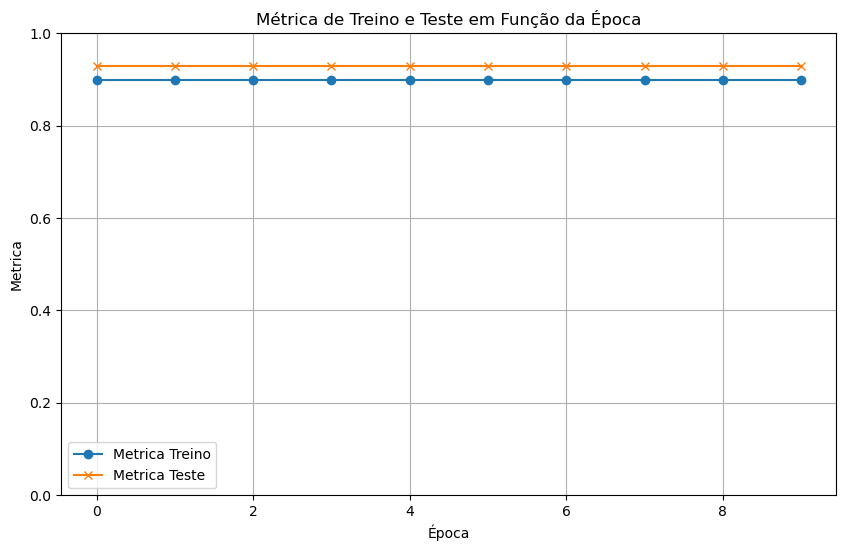

Roc Score Area under the curve: 0.75


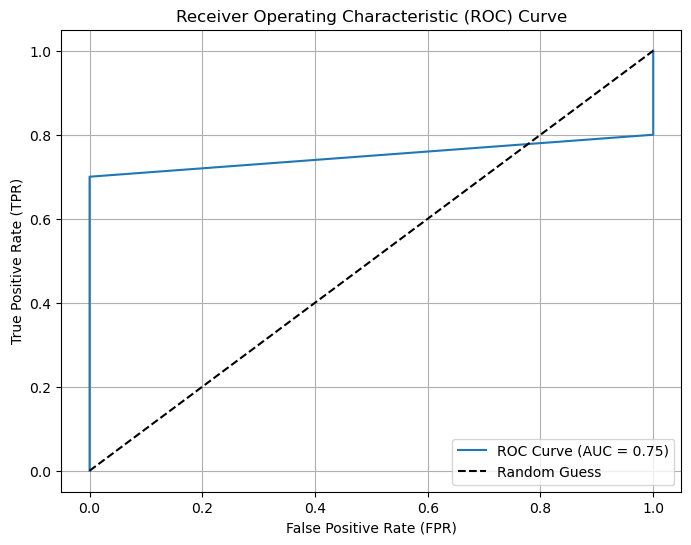

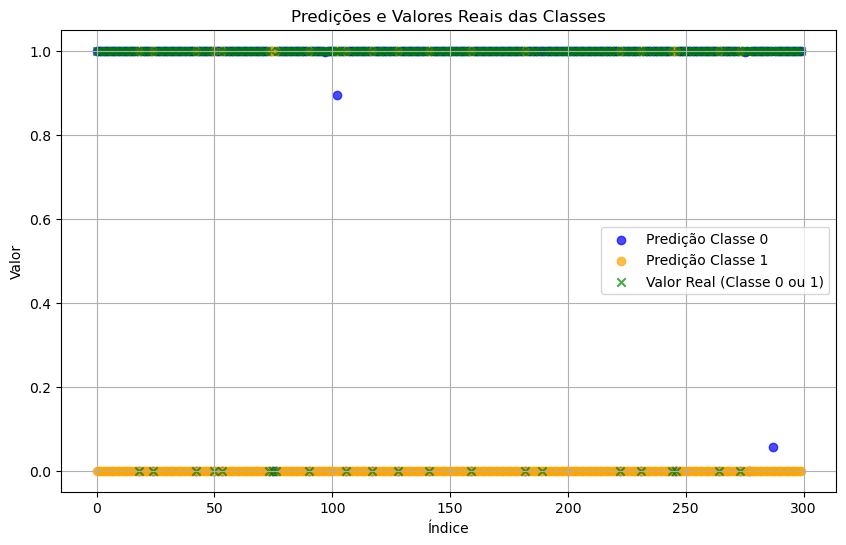

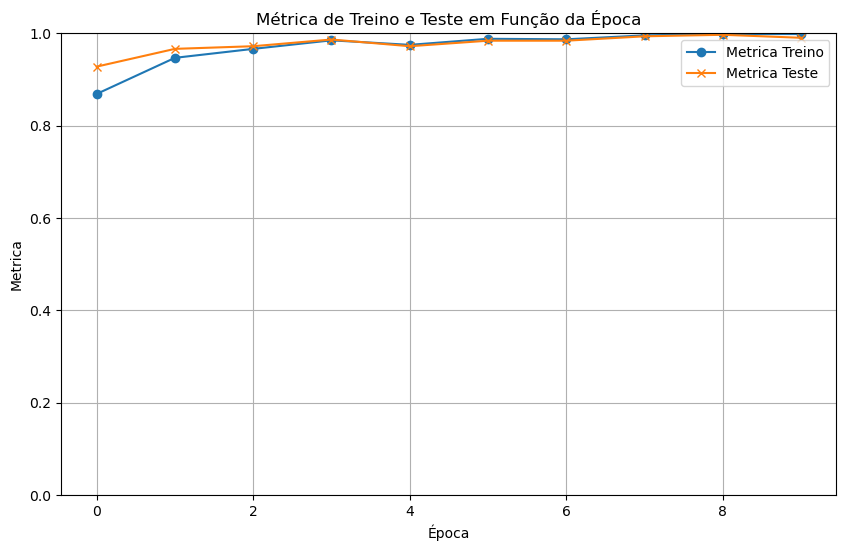

Roc Score Area under the curve: 0.9737573577501636


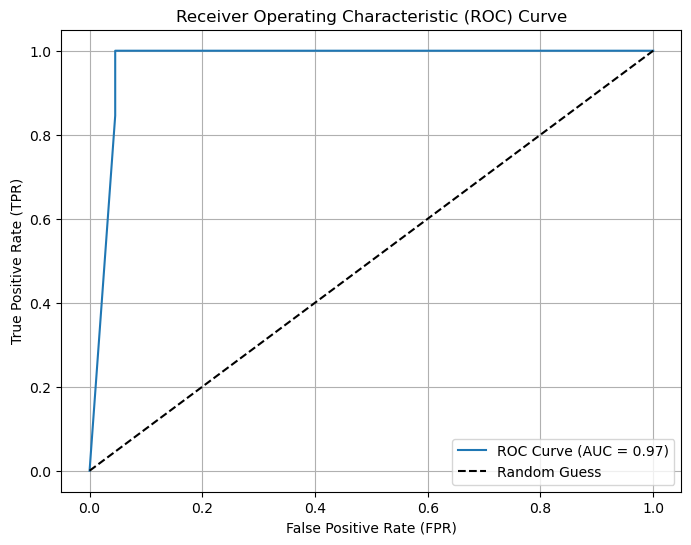

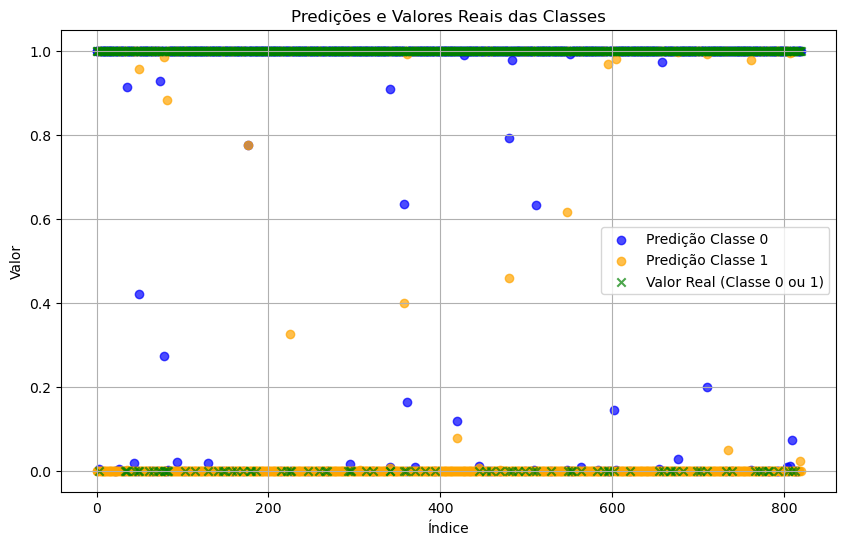

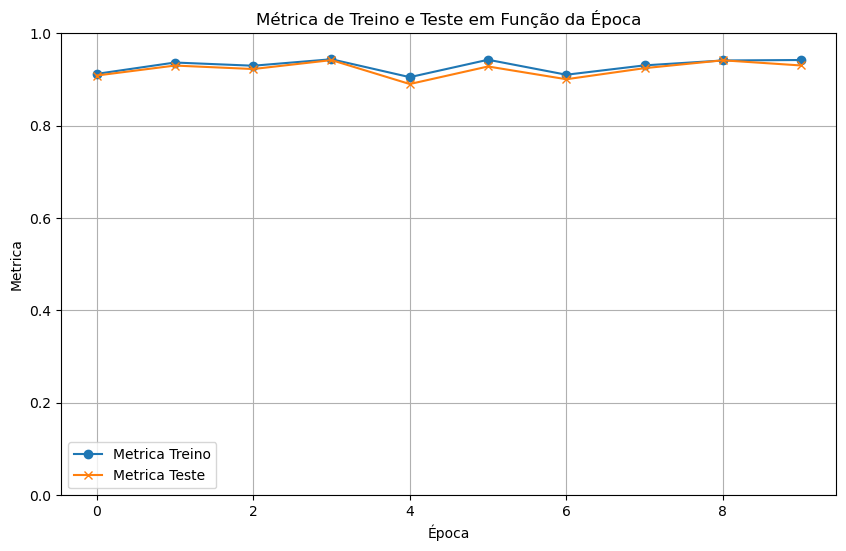

Roc Score Area under the curve: 0.8612644177105295


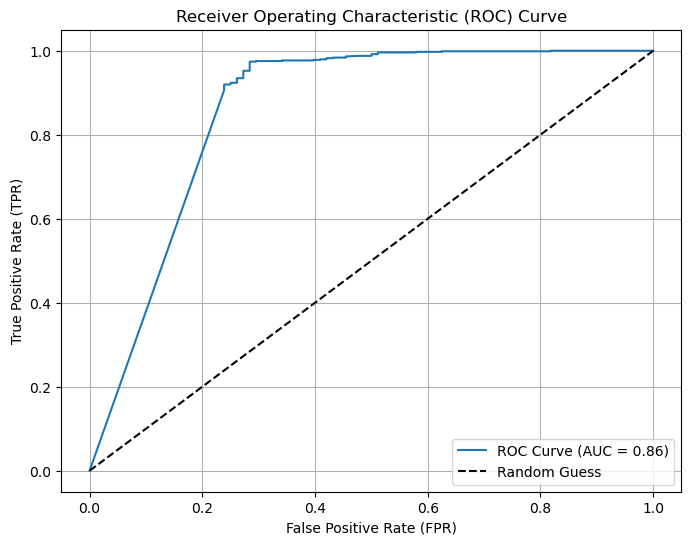

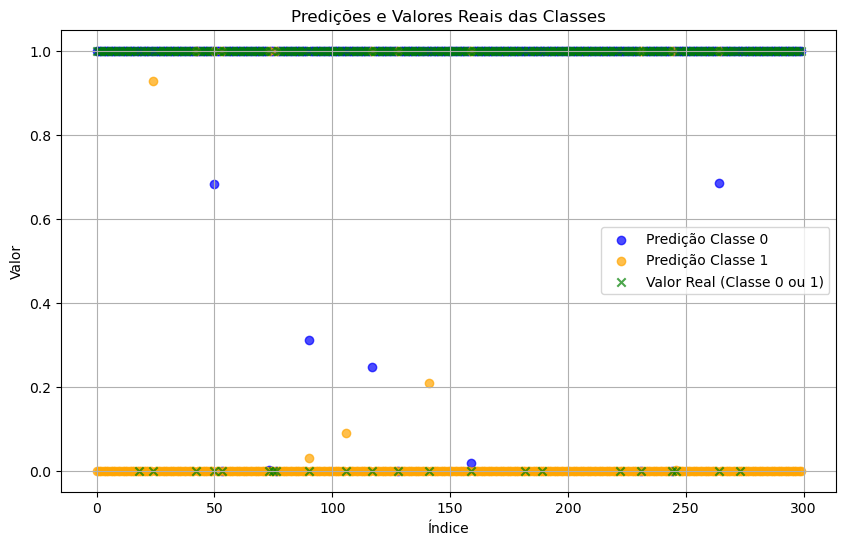

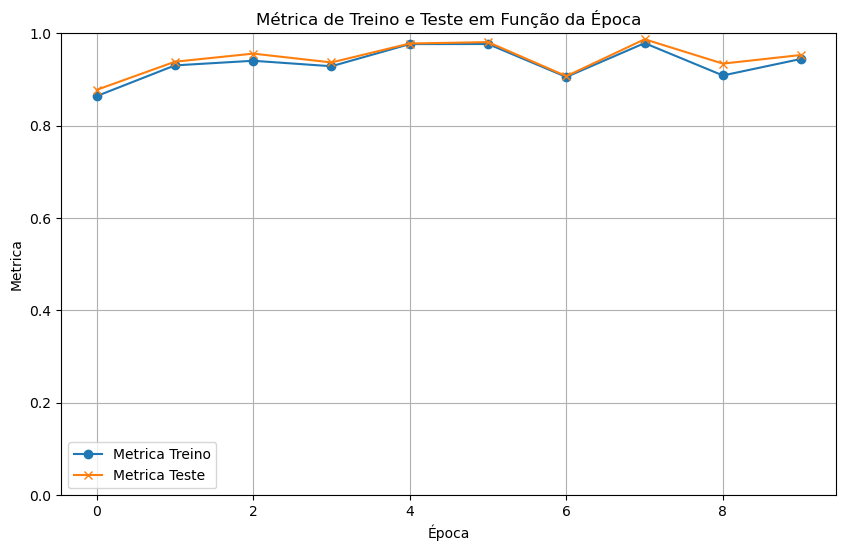

Roc Score Area under the curve: 0.9532374100719424


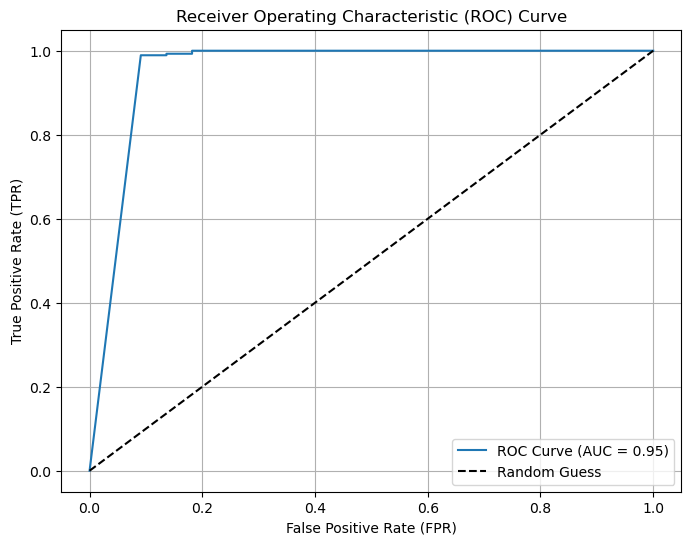

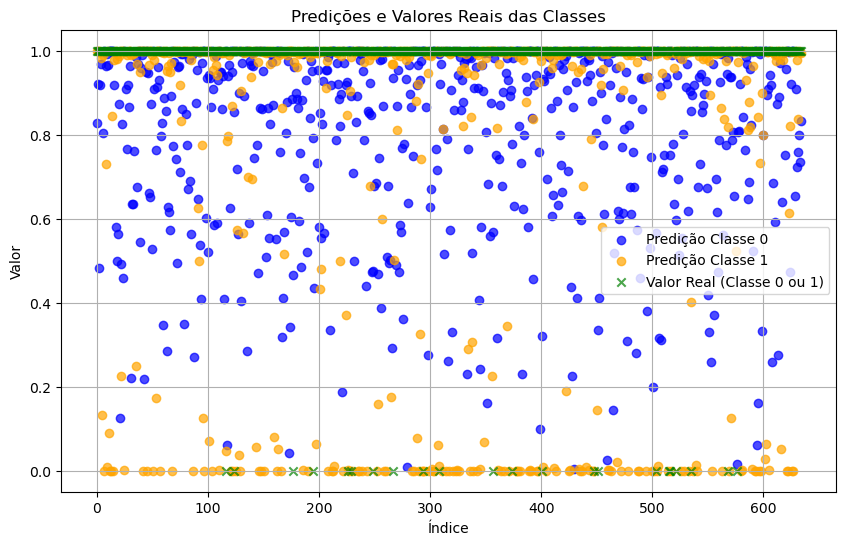

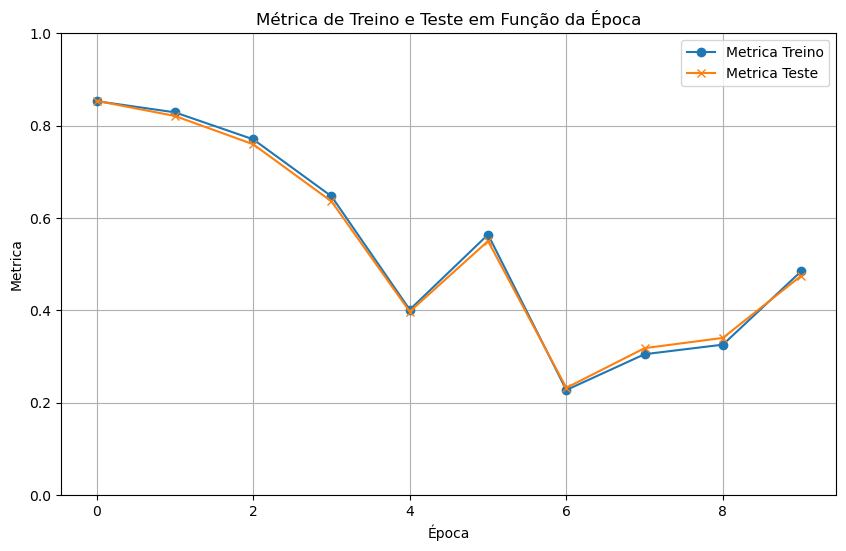

Roc Score Area under the curve: 0.5724454990360374


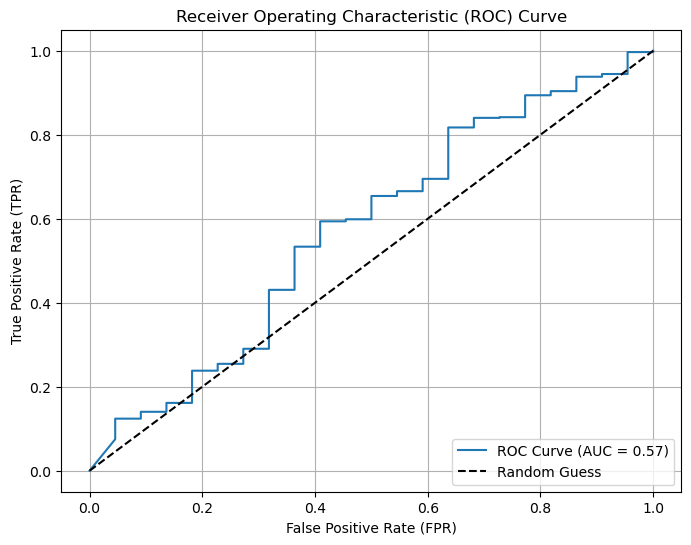

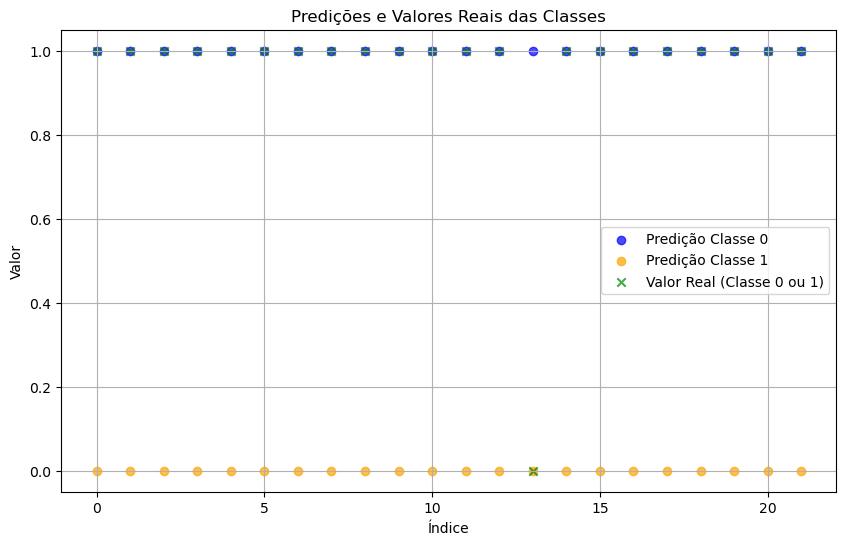

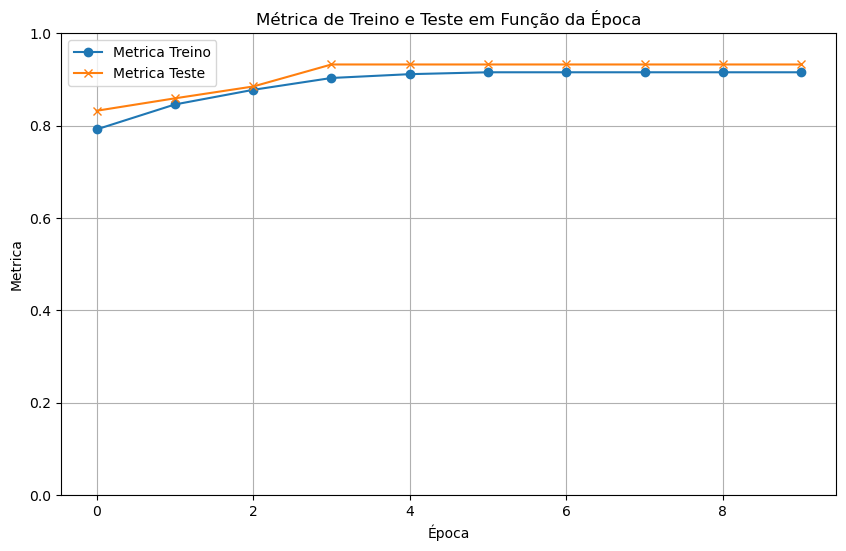

Roc Score Area under the curve: 0.5


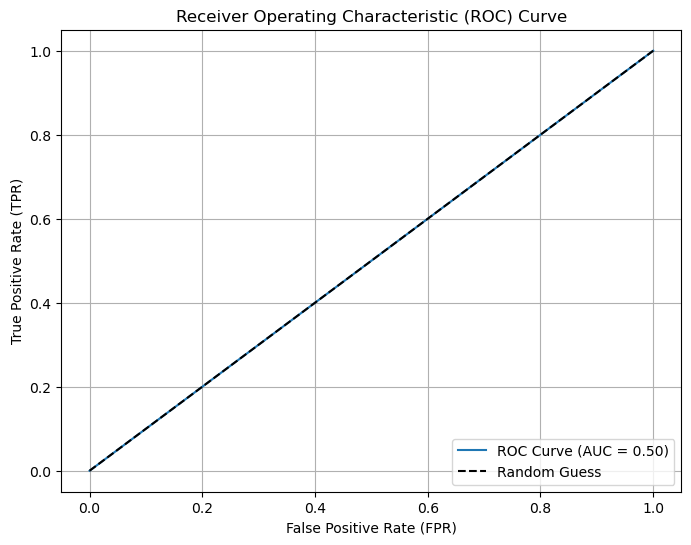

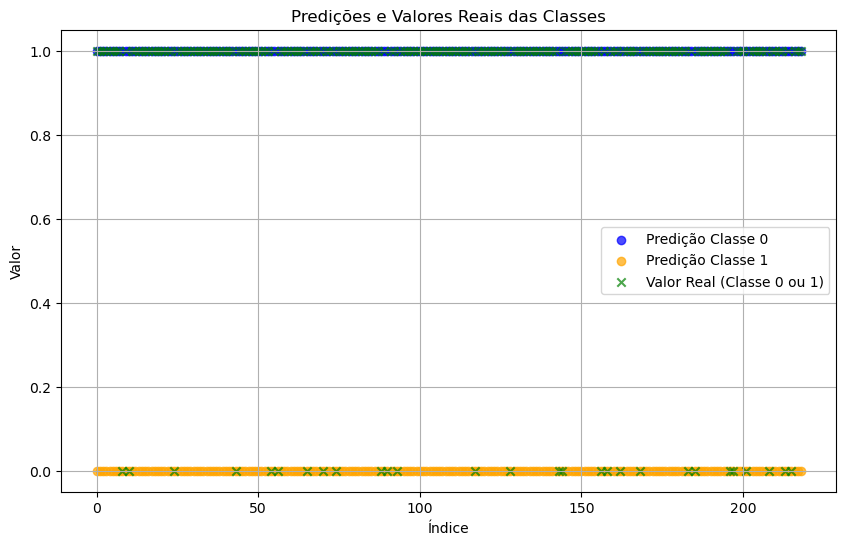

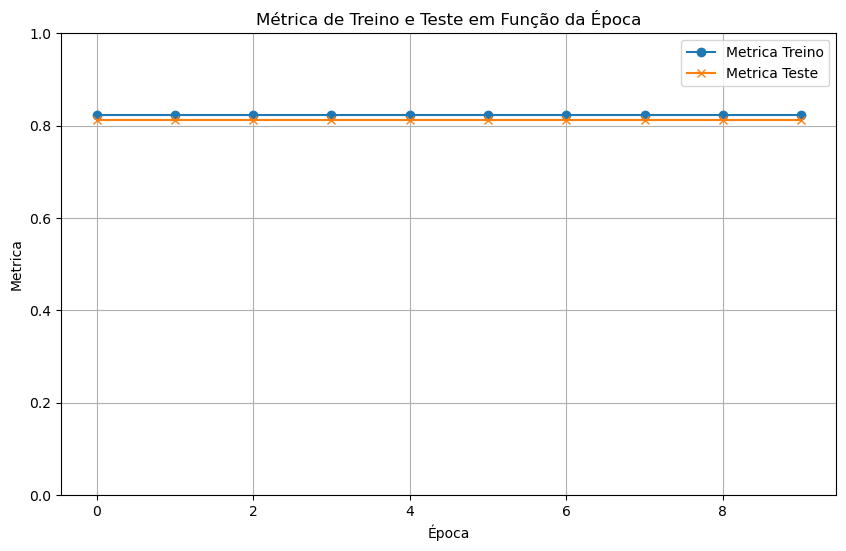

Roc Score Area under the curve: 0.5


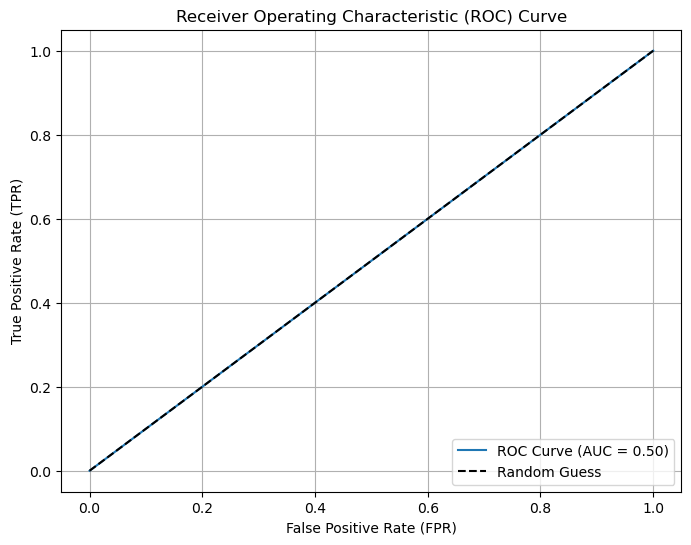

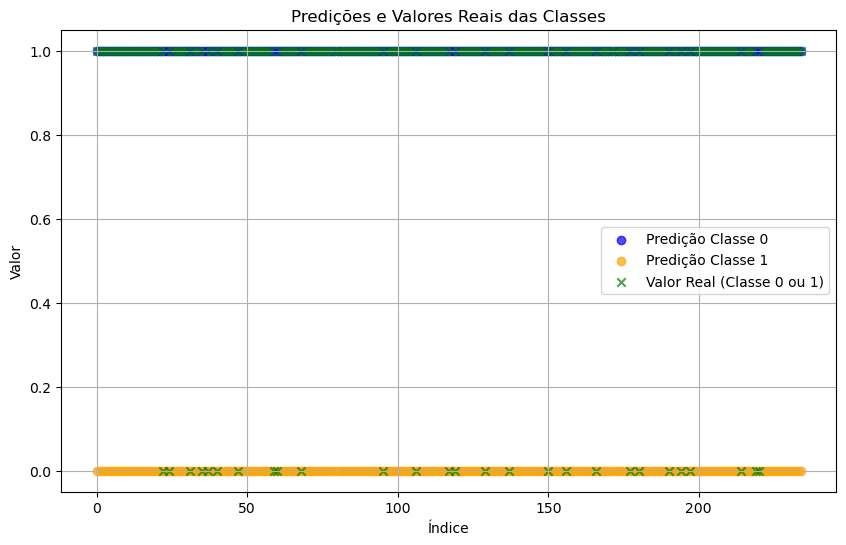

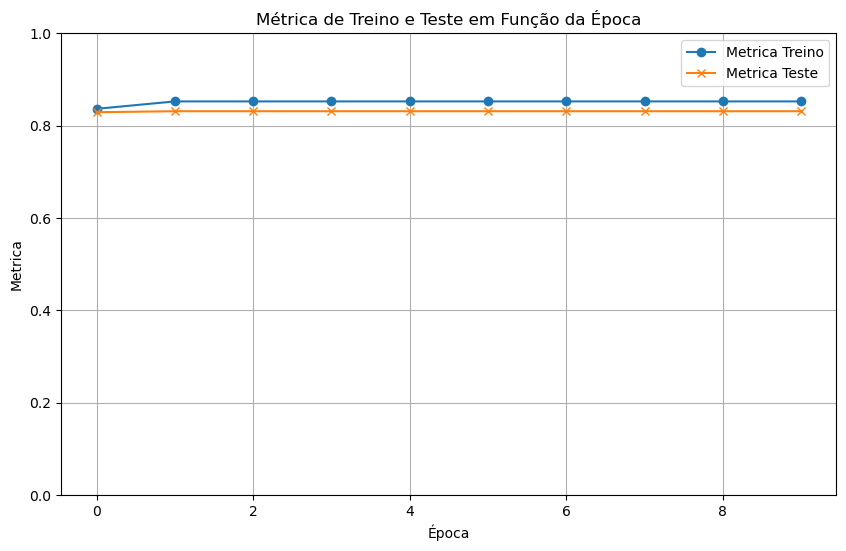

Roc Score Area under the curve: 0.5


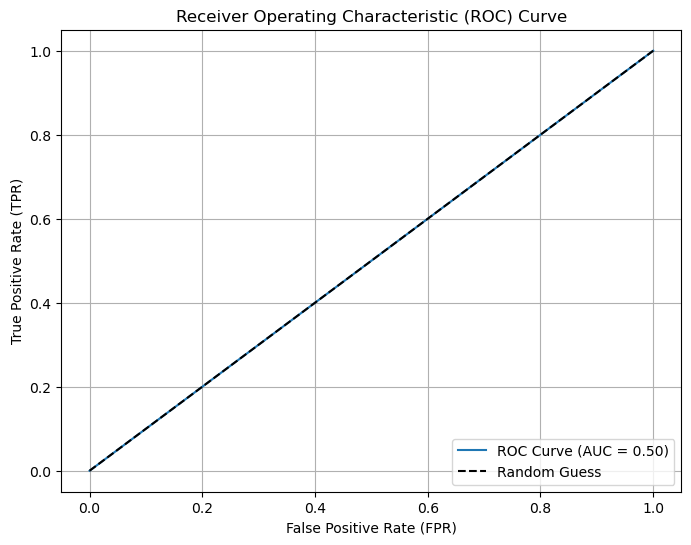

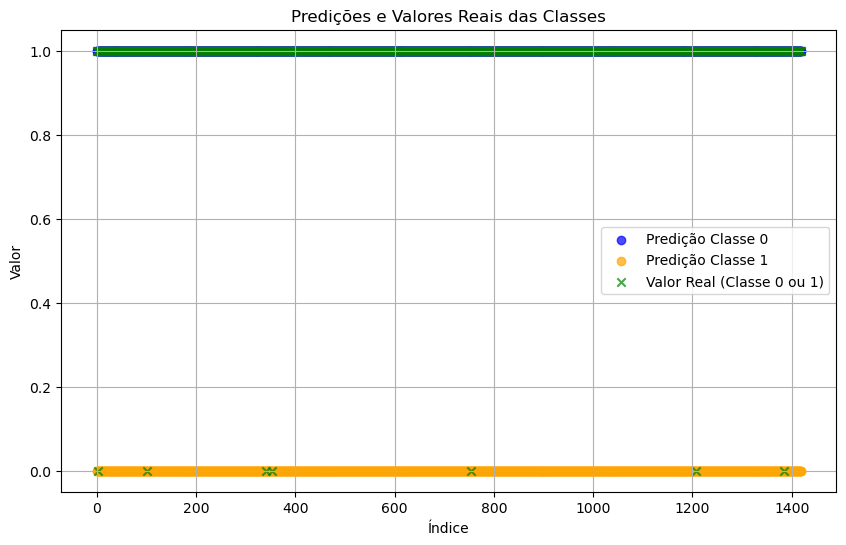

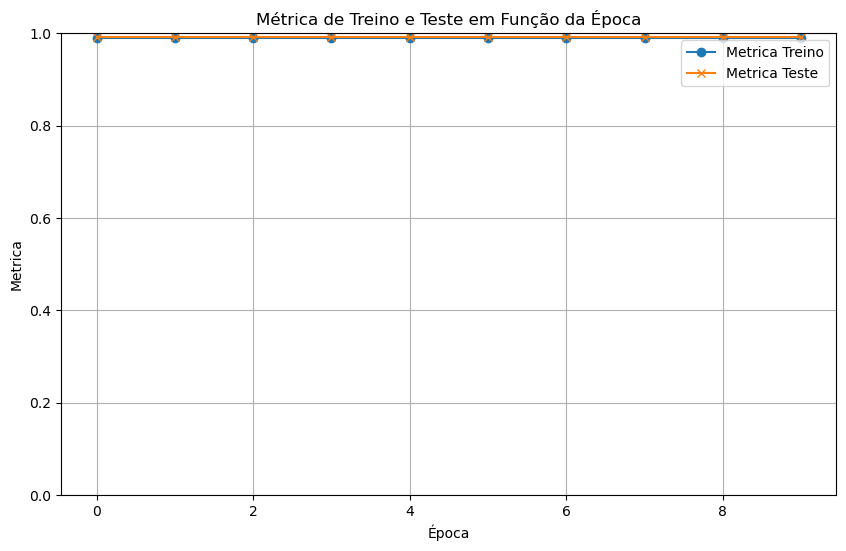

Roc Score Area under the curve: 0.5


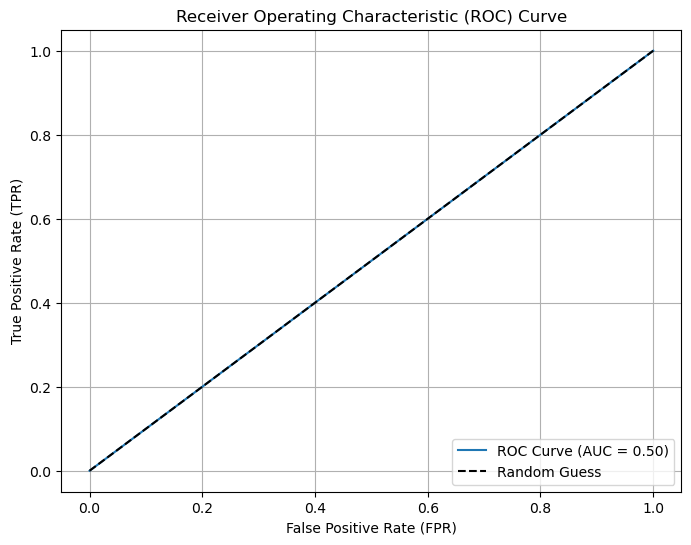

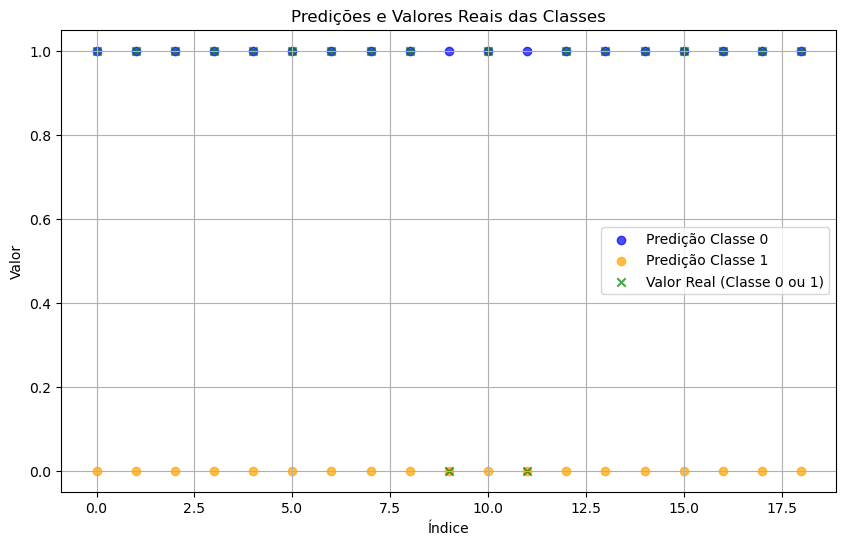

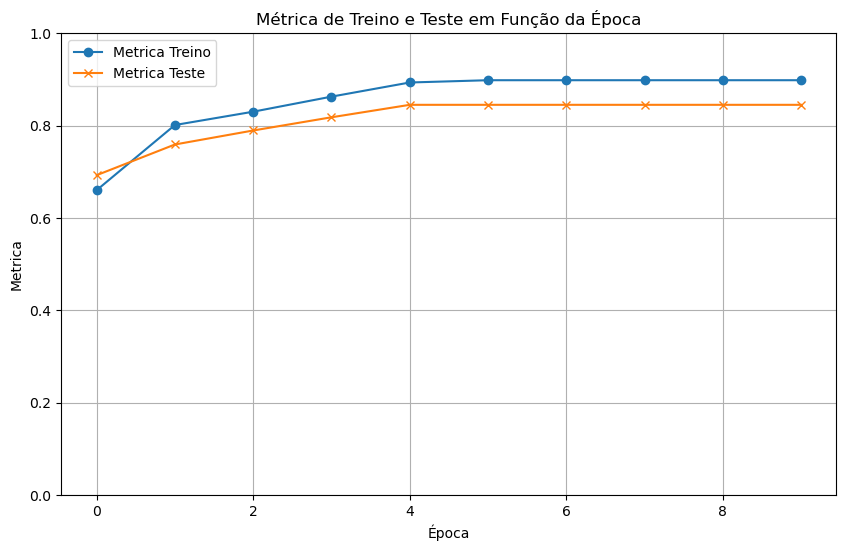

Roc Score Area under the curve: 0.4411764705882353


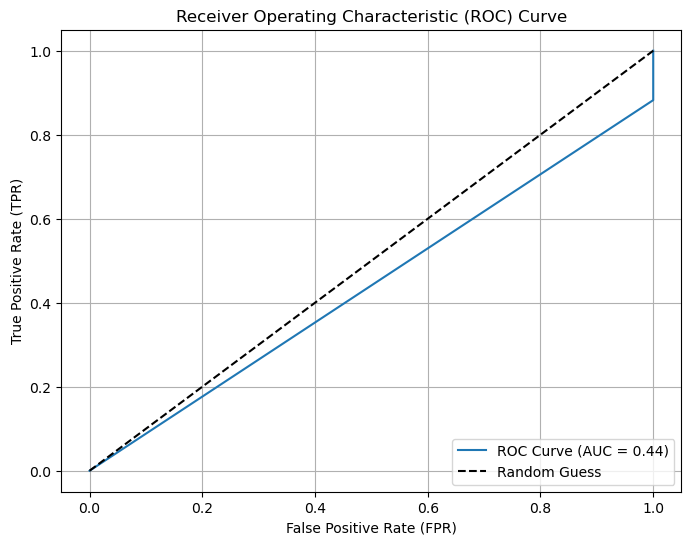

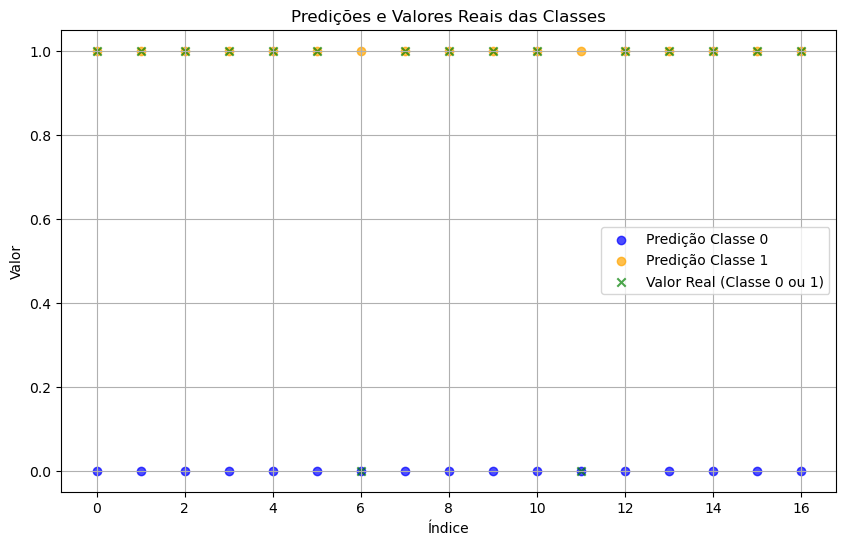

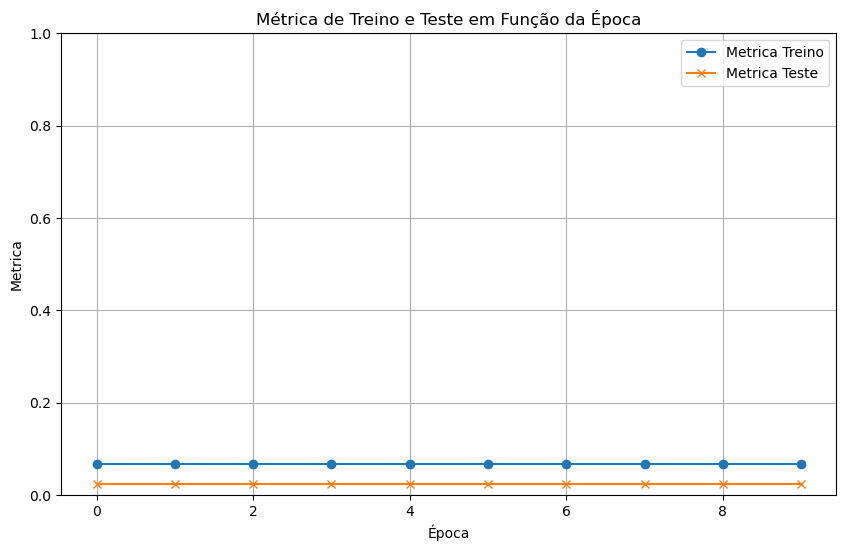

Roc Score Area under the curve: 0.7


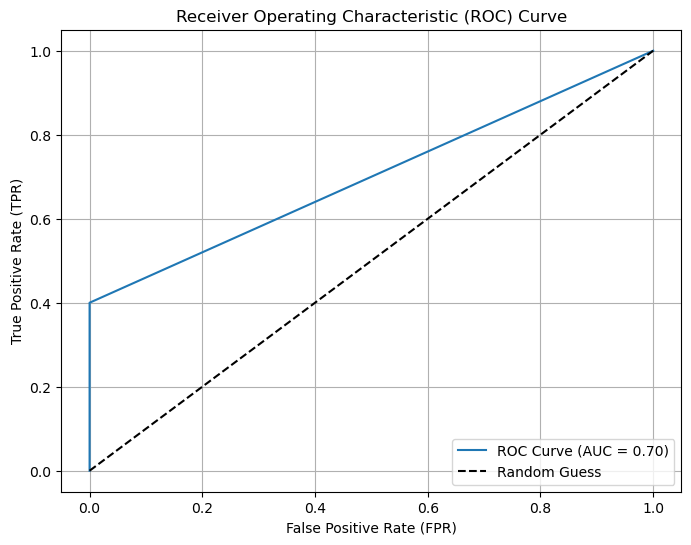

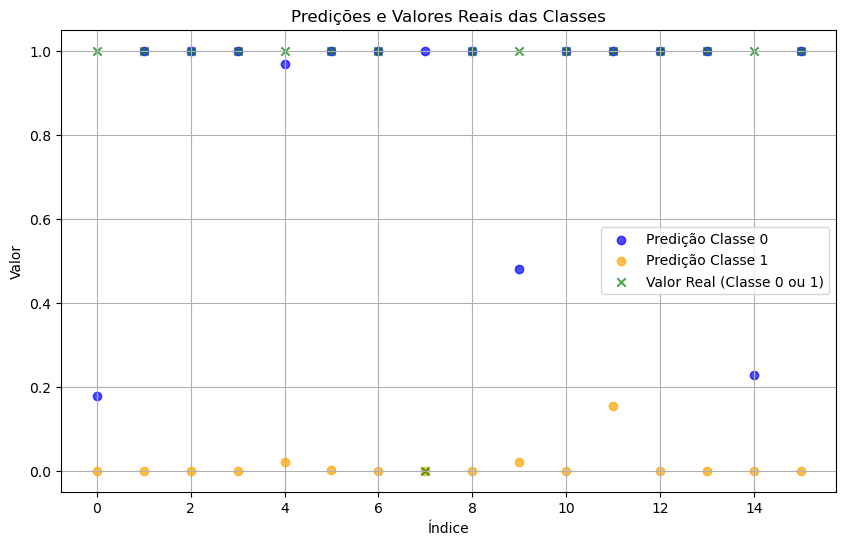

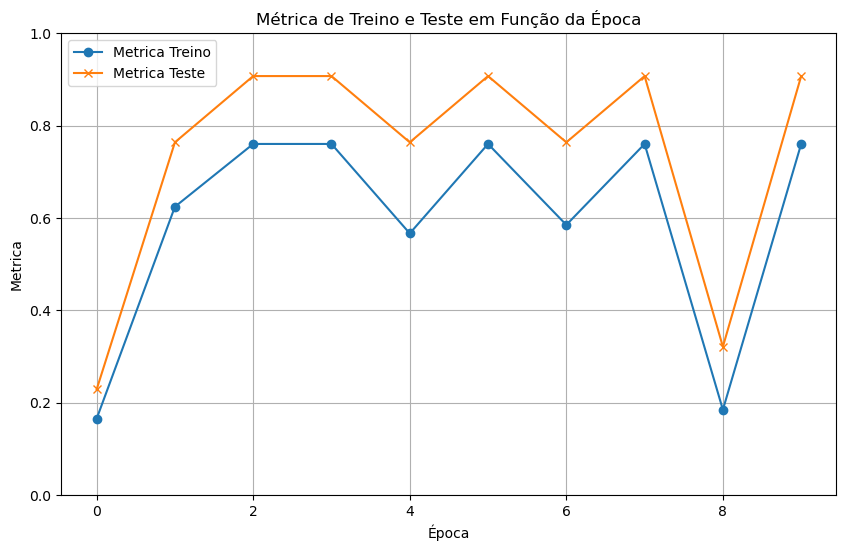

Roc Score Area under the curve: 0.26666666666666666


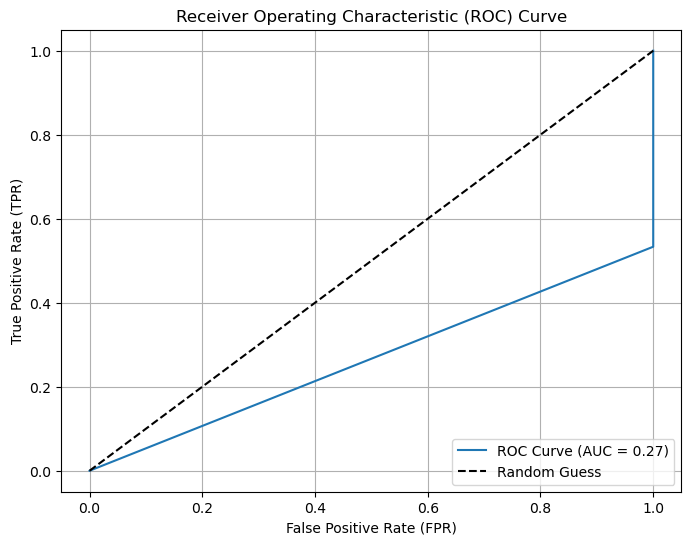

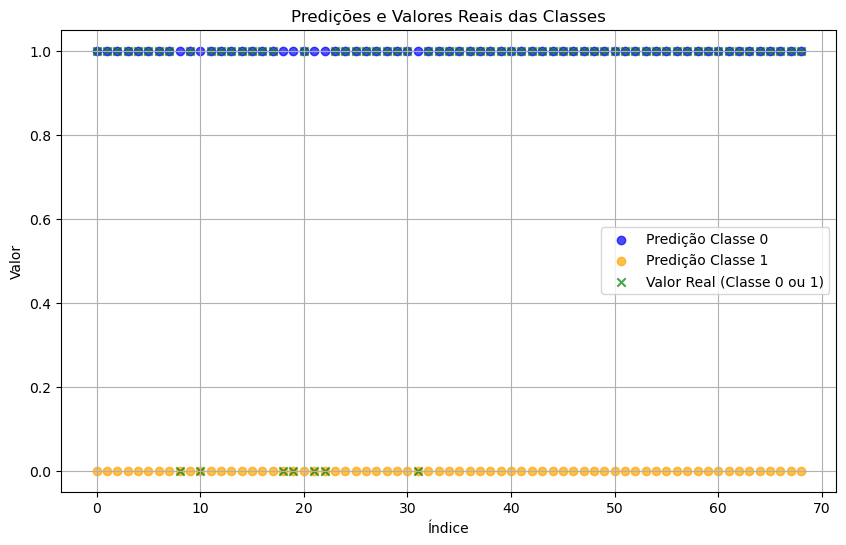

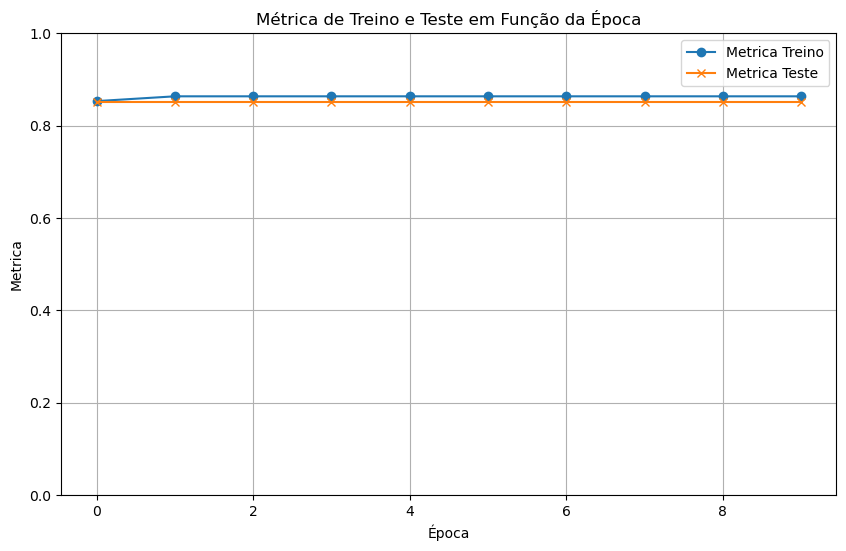

Roc Score Area under the curve: 0.5


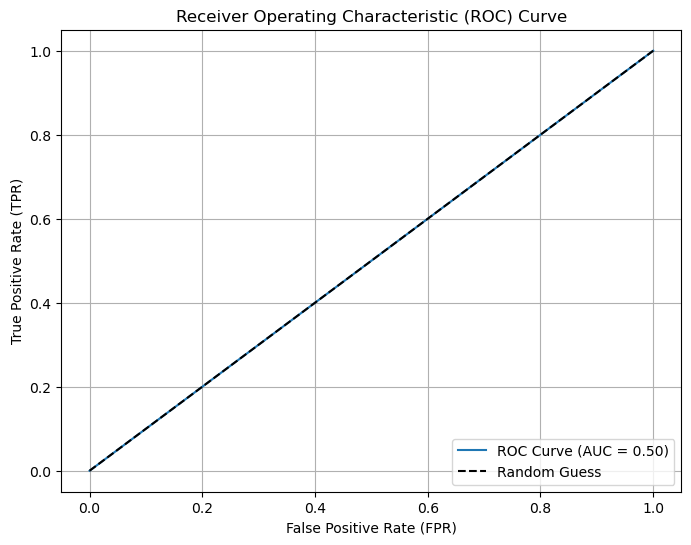

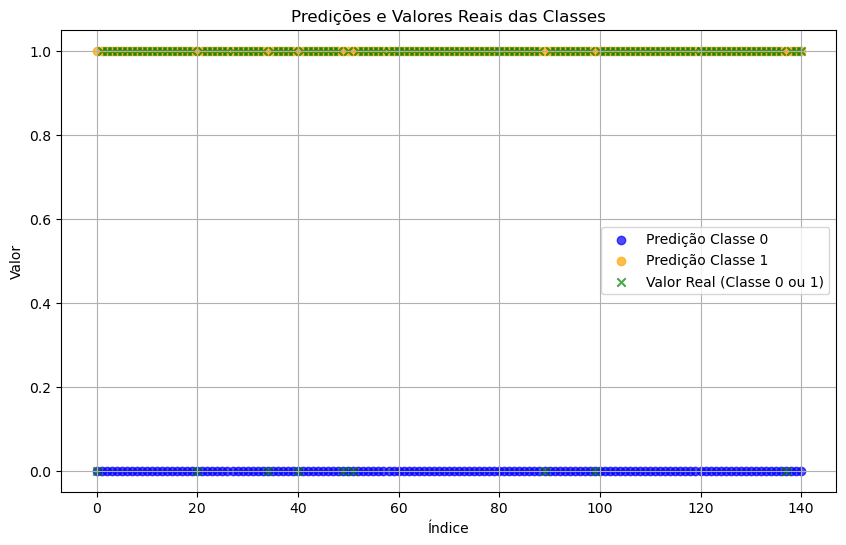

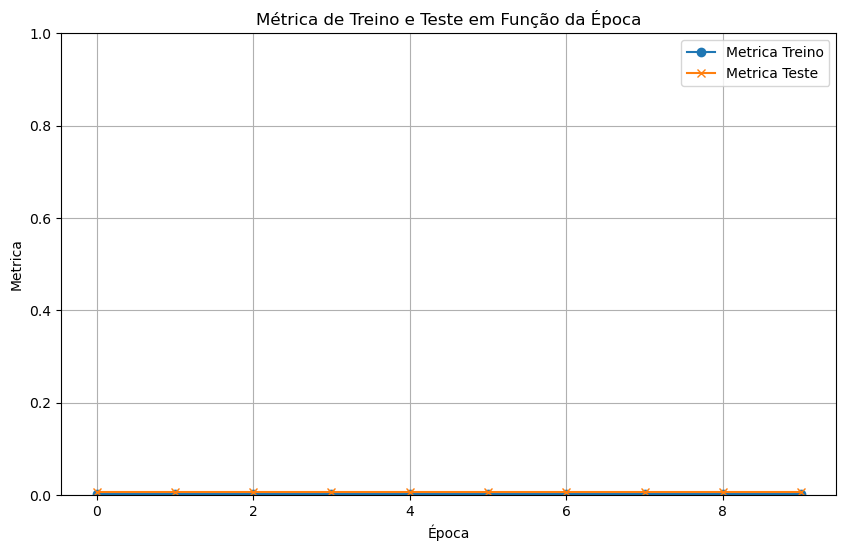

Roc Score Area under the curve: 0.5


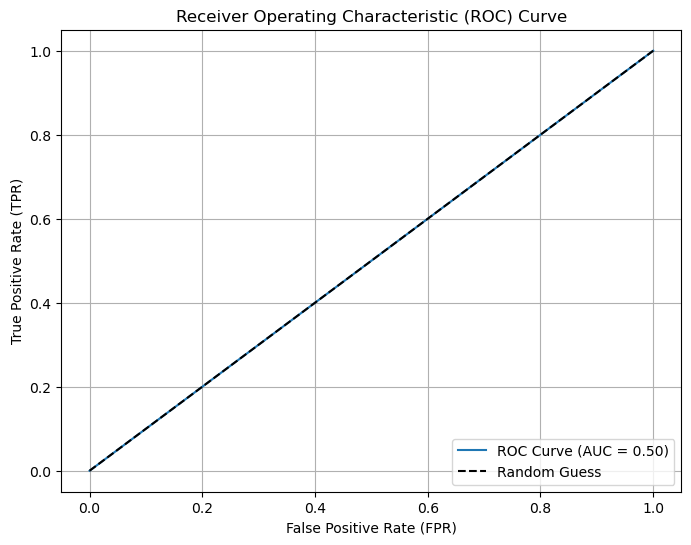

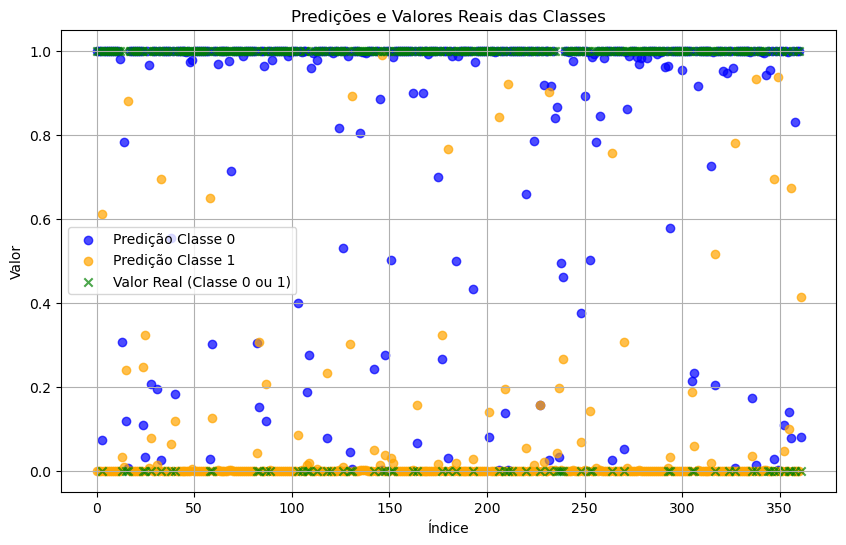

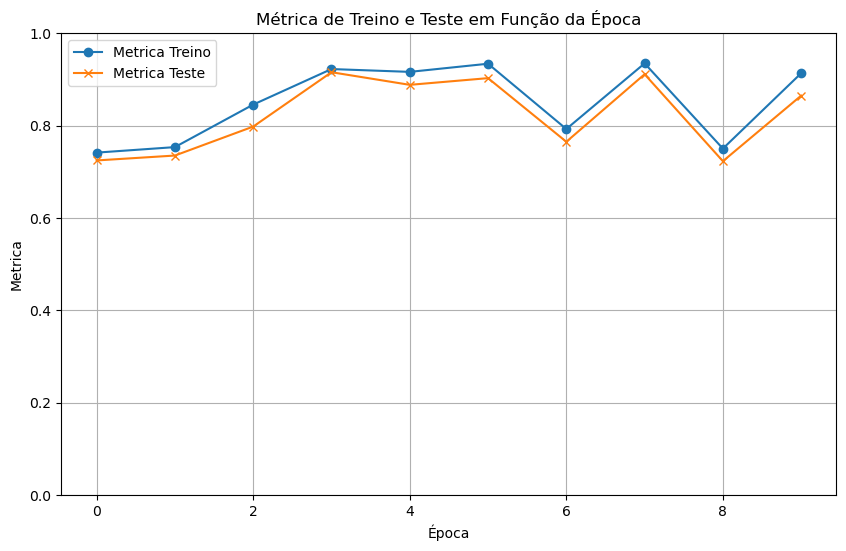

Roc Score Area under the curve: 0.9573592759304971


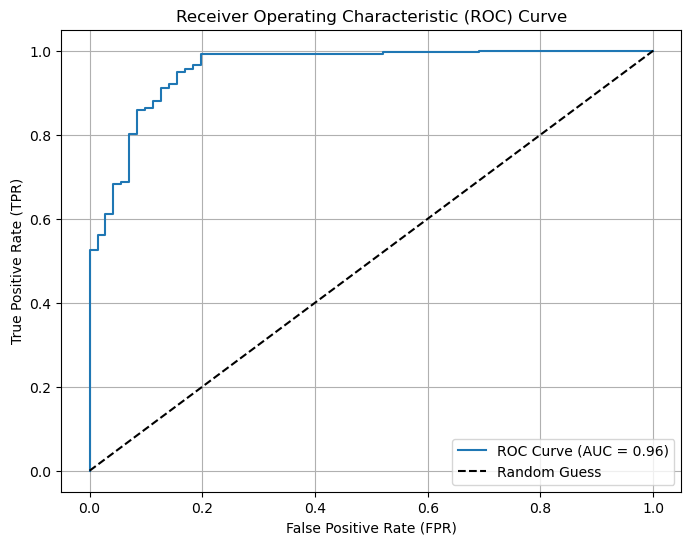

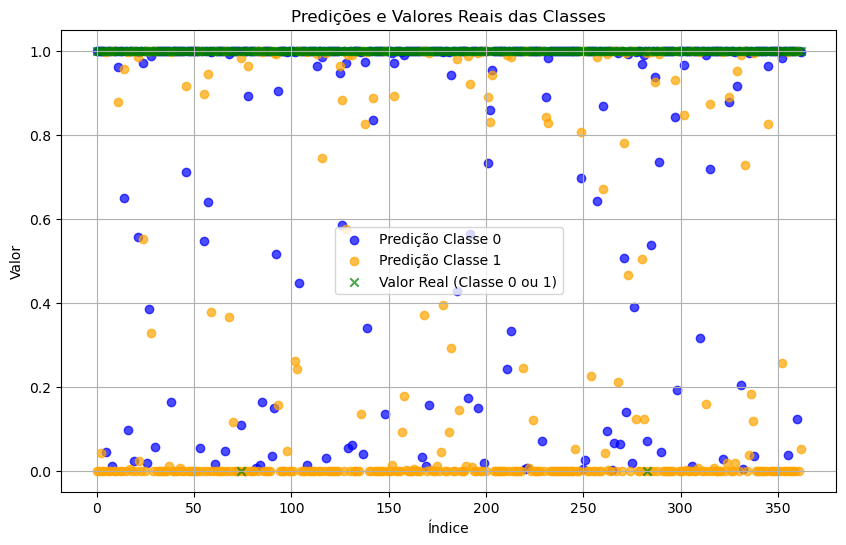

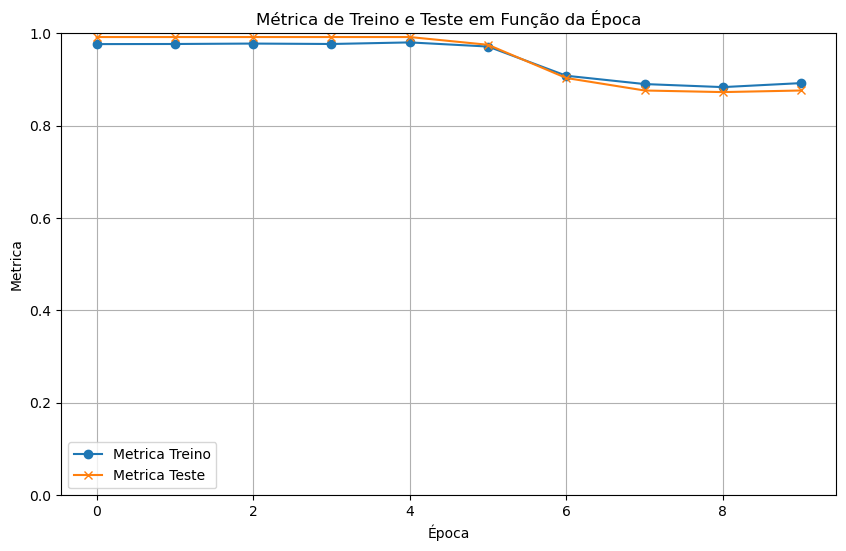

Roc Score Area under the curve: 0.9044321329639888


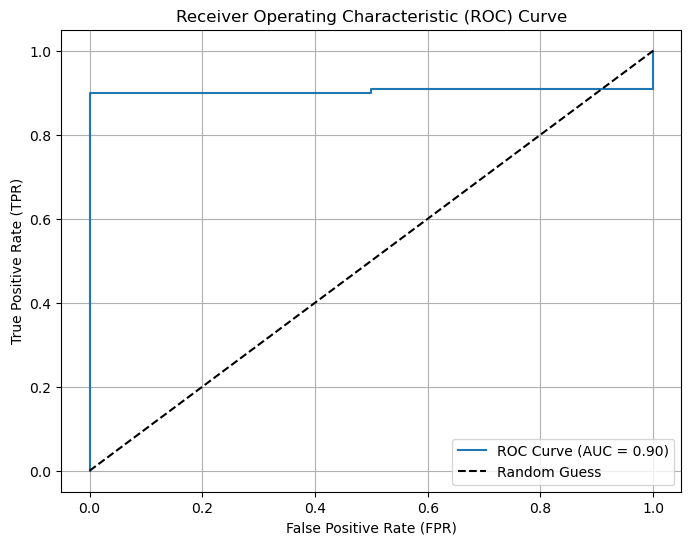

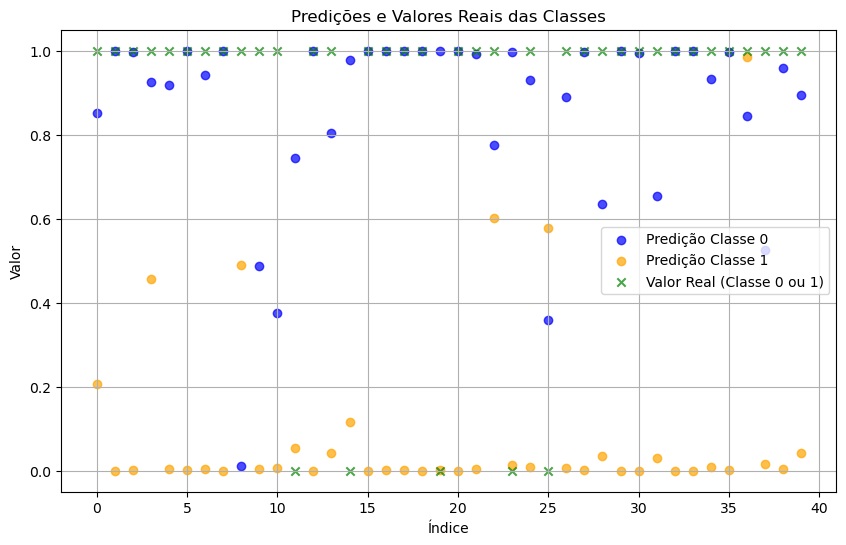

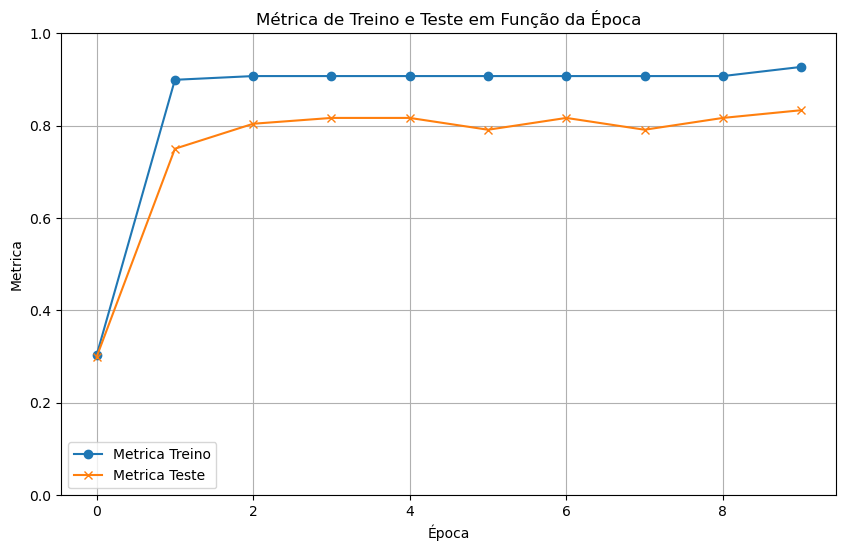

Roc Score Area under the curve: 0.5714285714285714


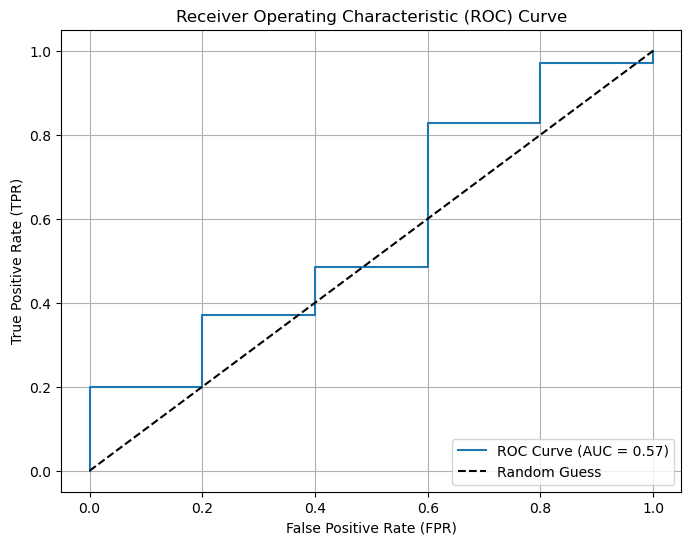

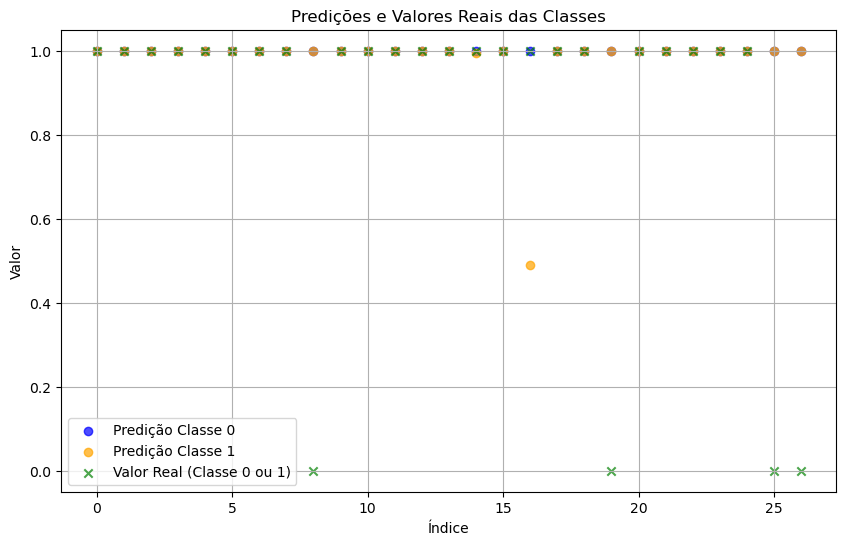

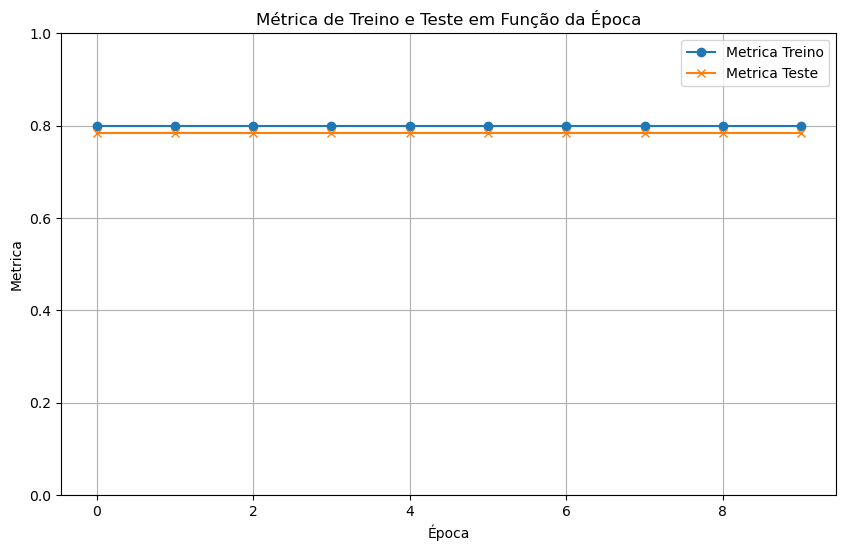

Roc Score Area under the curve: 0.5


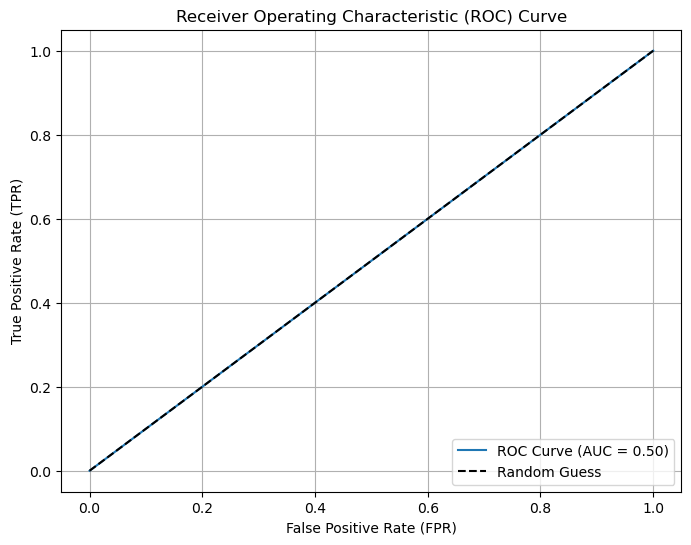

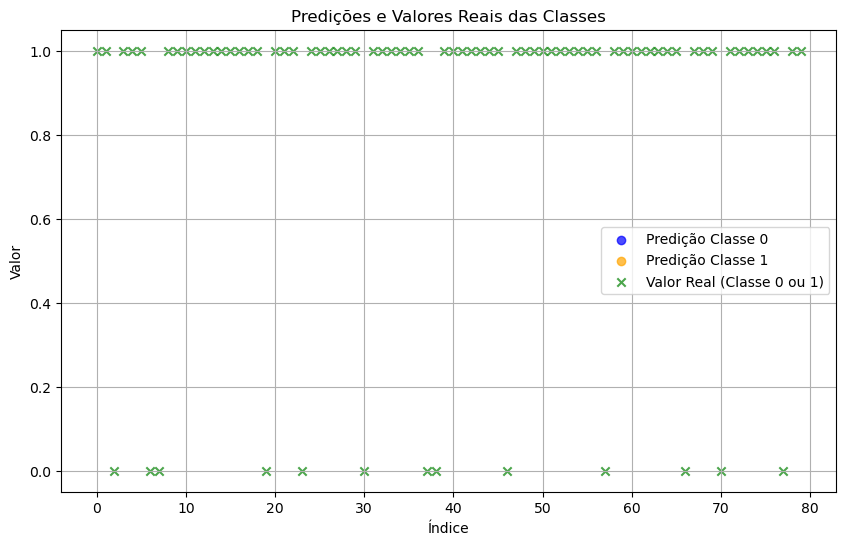

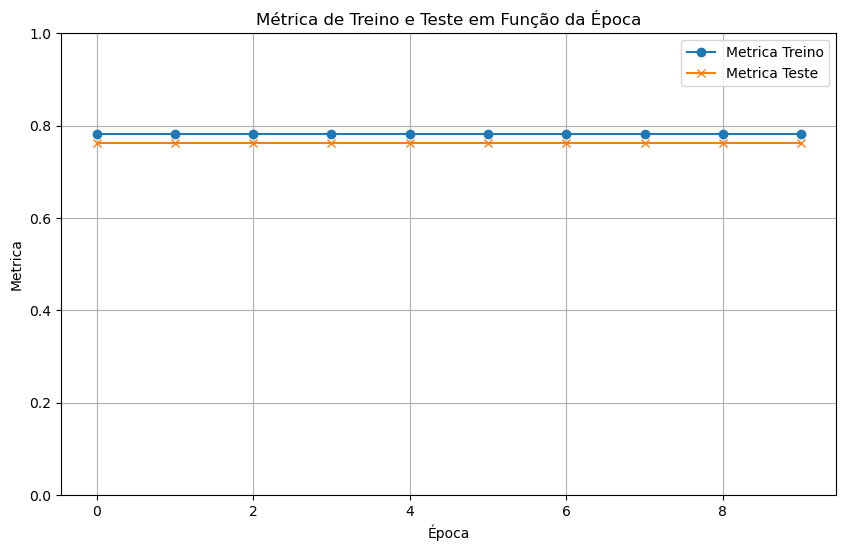

Erro ao plotar para o modelo: Input contains NaN.


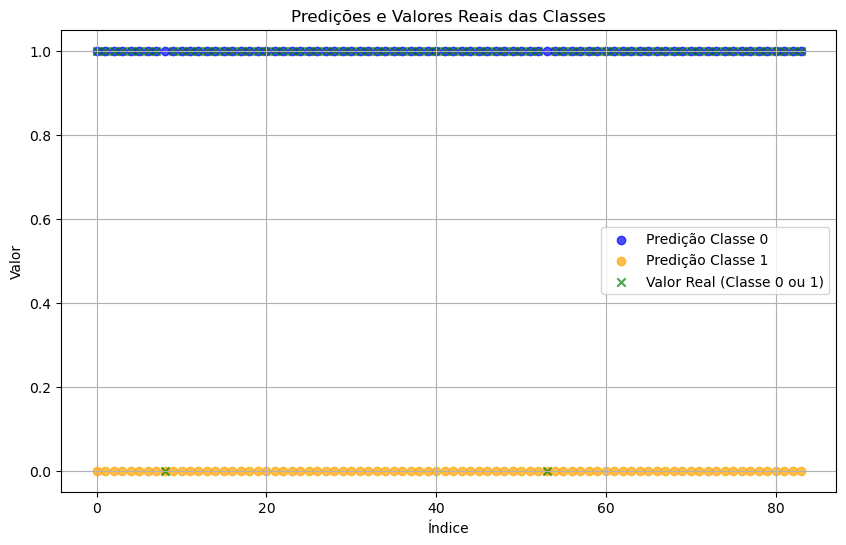

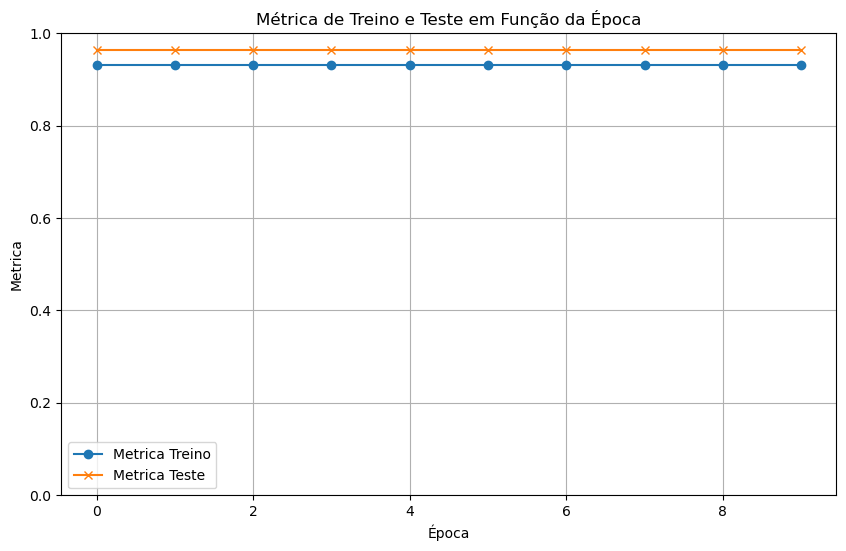

Roc Score Area under the curve: 0.5


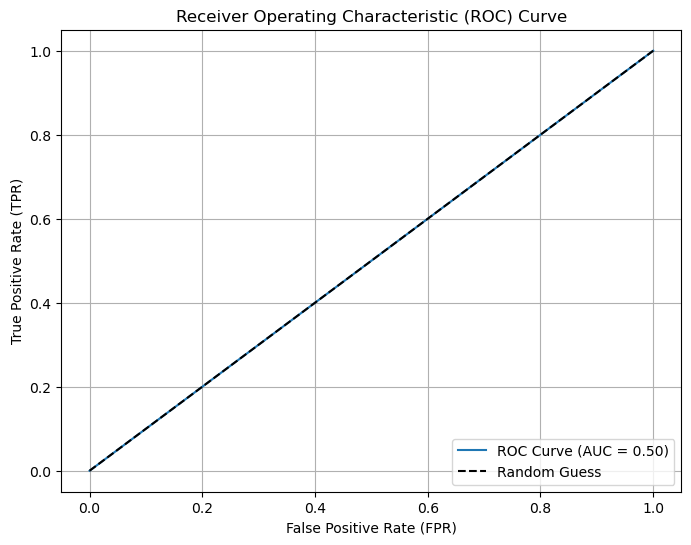

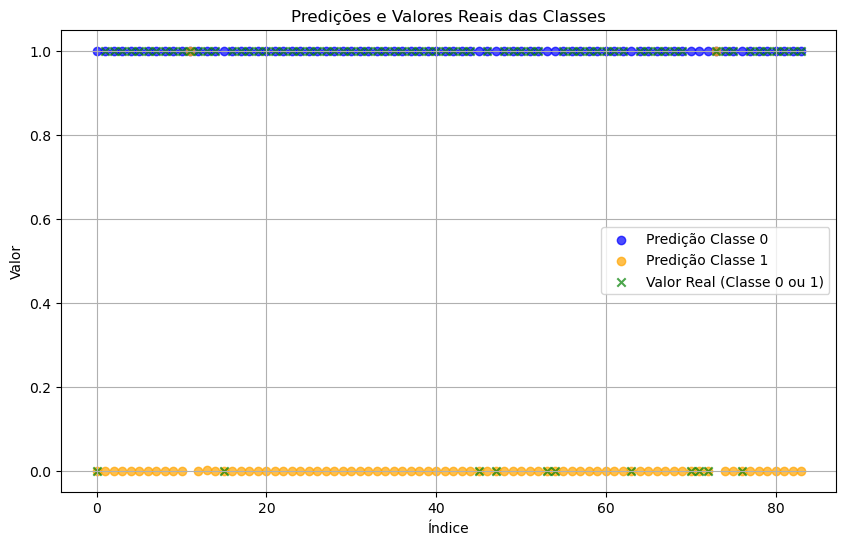

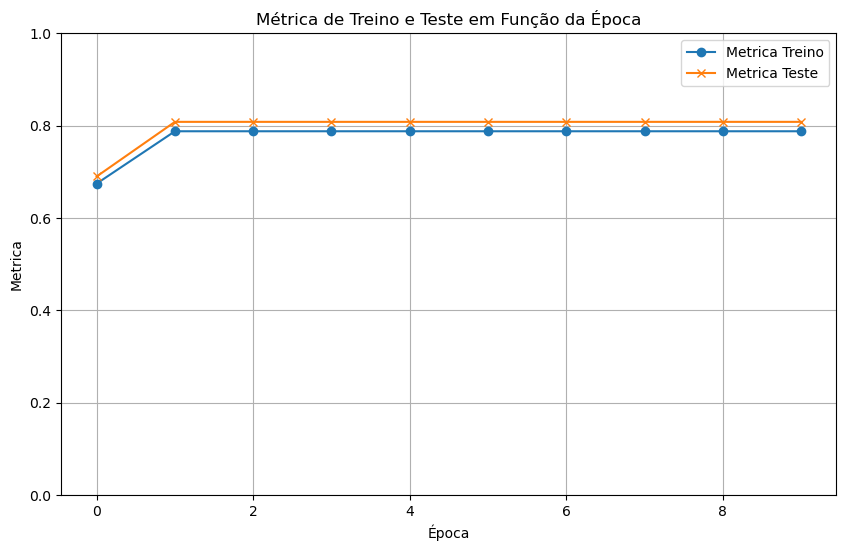

Roc Score Area under the curve: 0.5


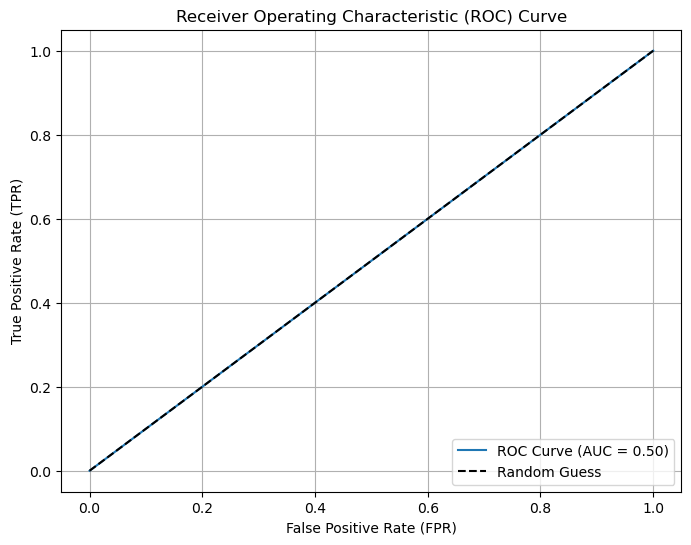

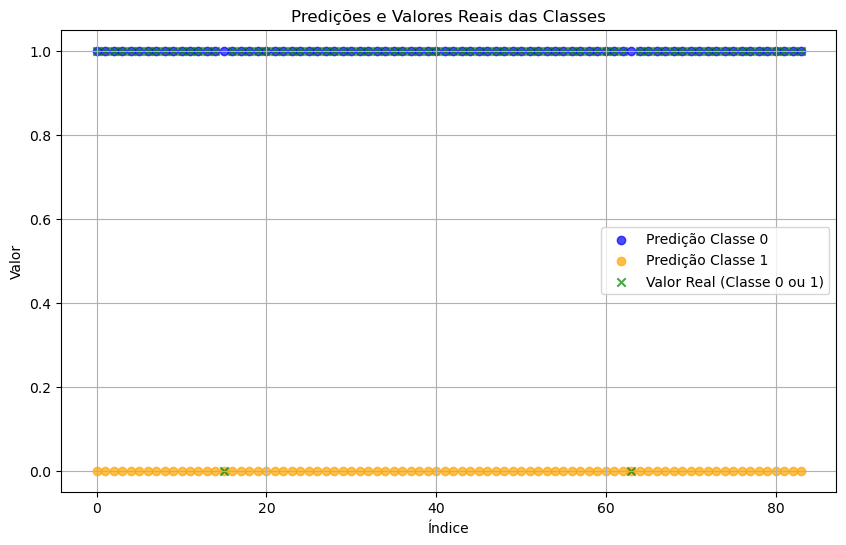

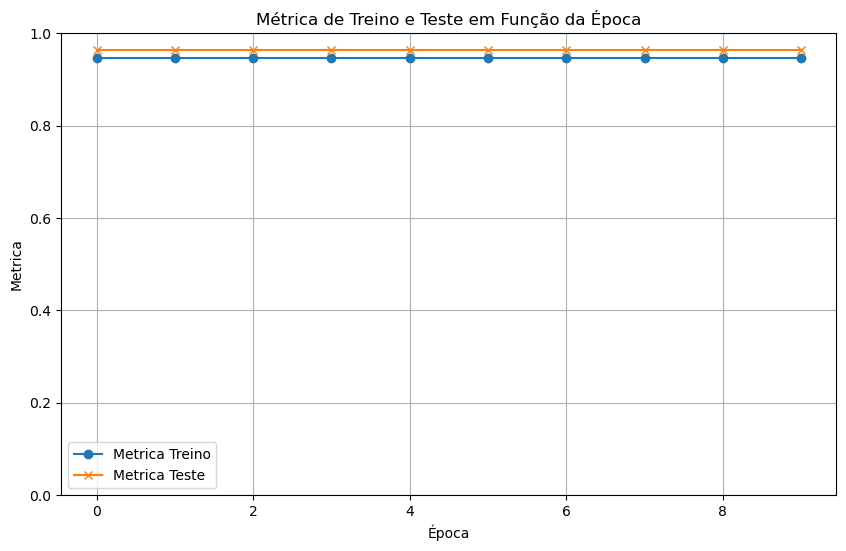

Roc Score Area under the curve: 0.5


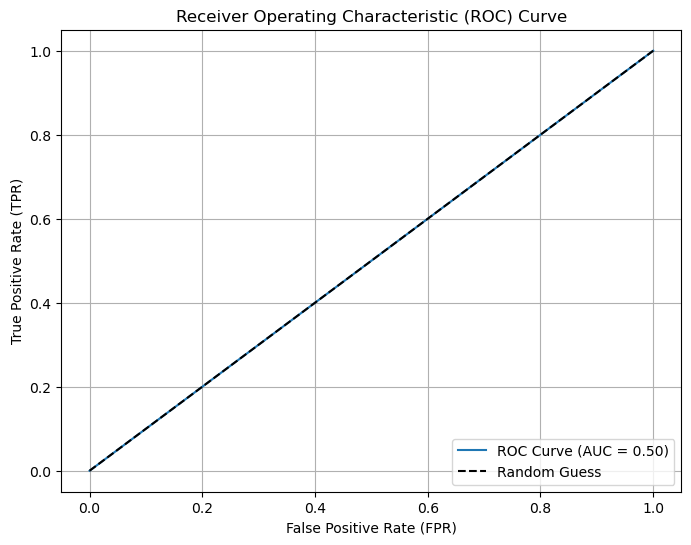

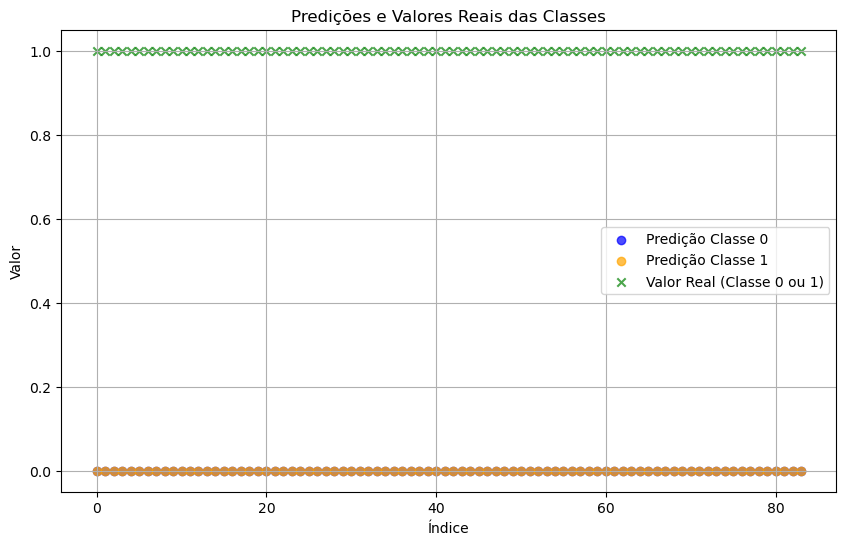

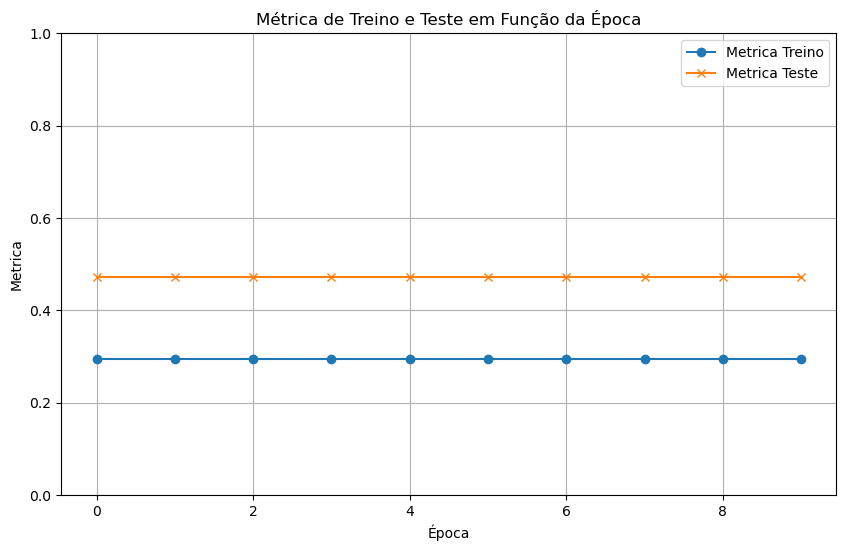

Erro ao plotar para o modelo: Only one class present in y_true. ROC AUC score is not defined in that case.


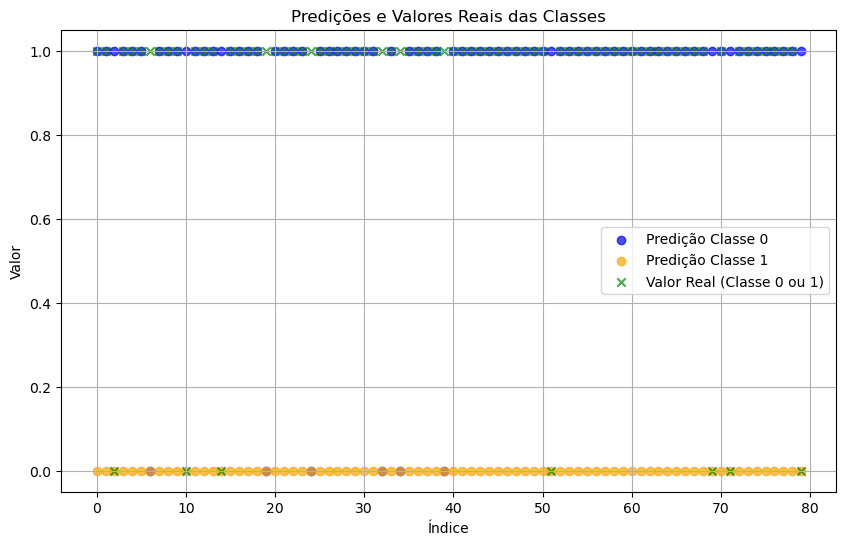

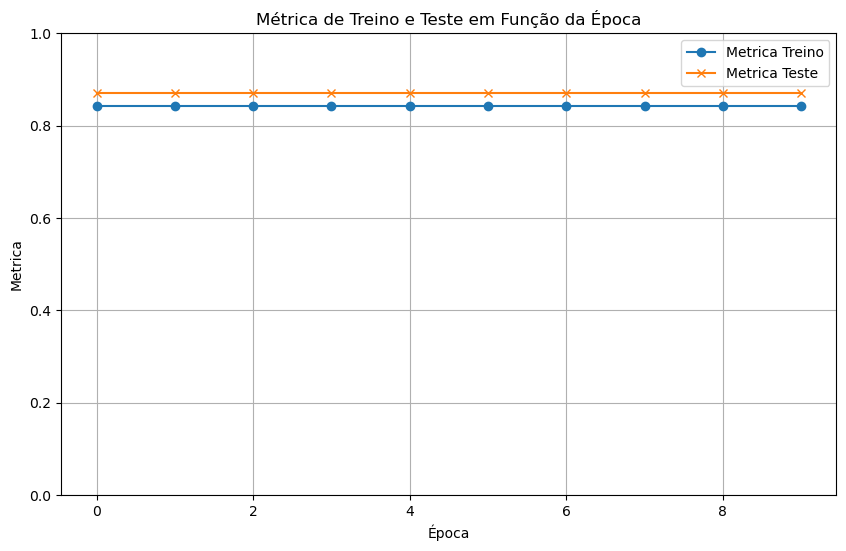

Roc Score Area under the curve: 0.4589041095890411


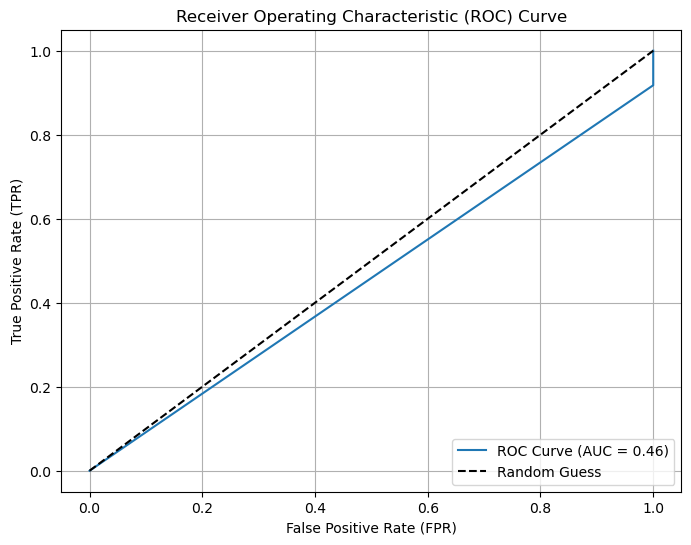

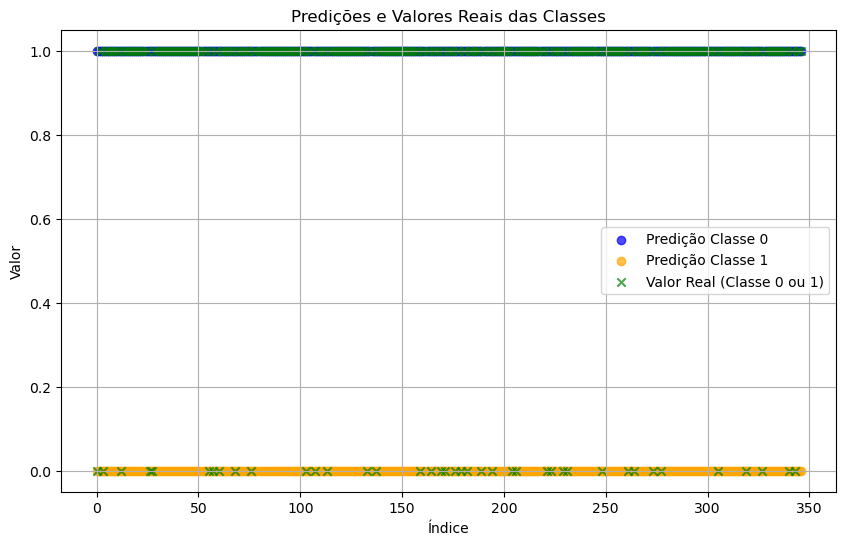

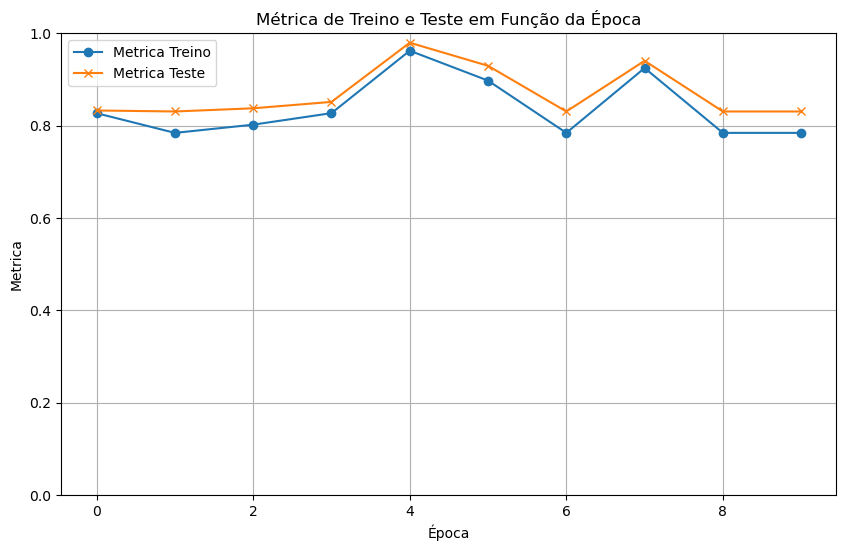

Roc Score Area under the curve: 0.5


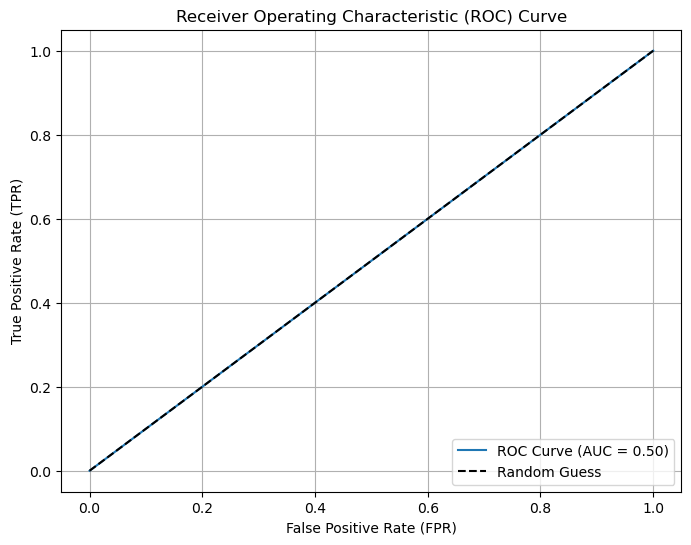

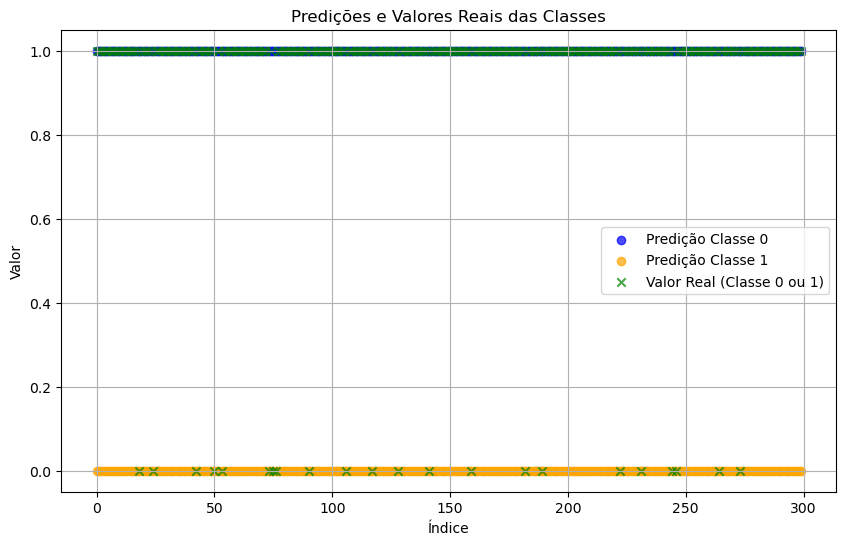

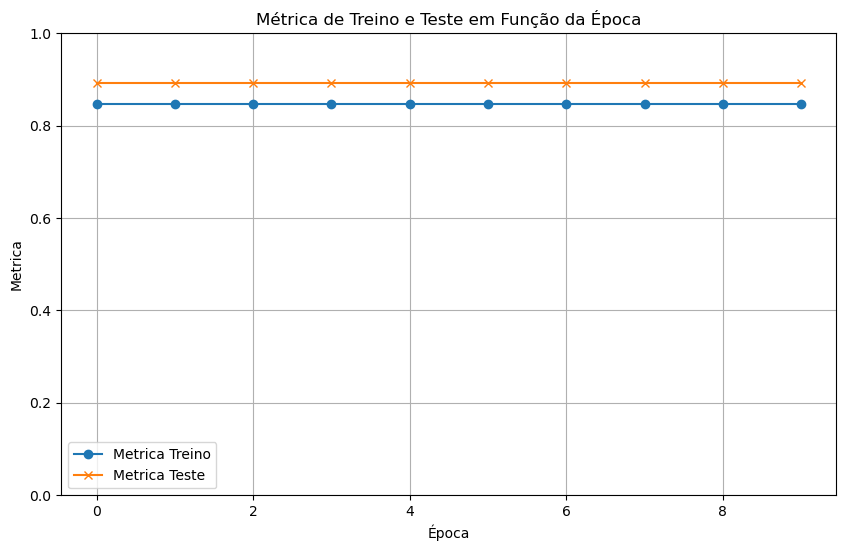

Roc Score Area under the curve: 0.5


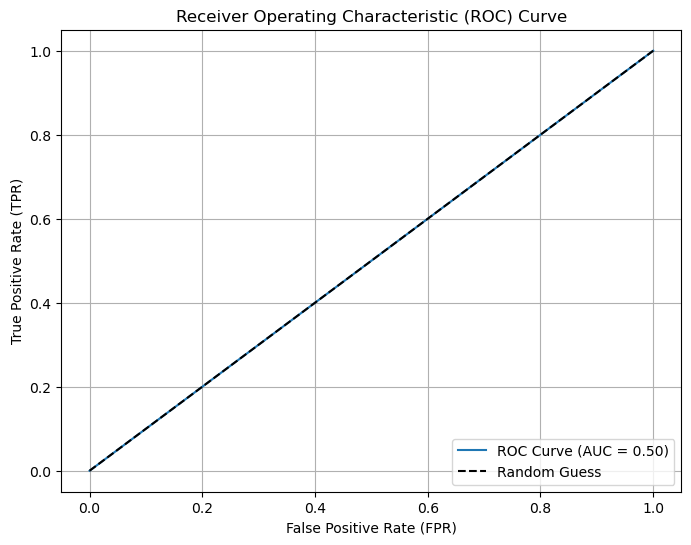

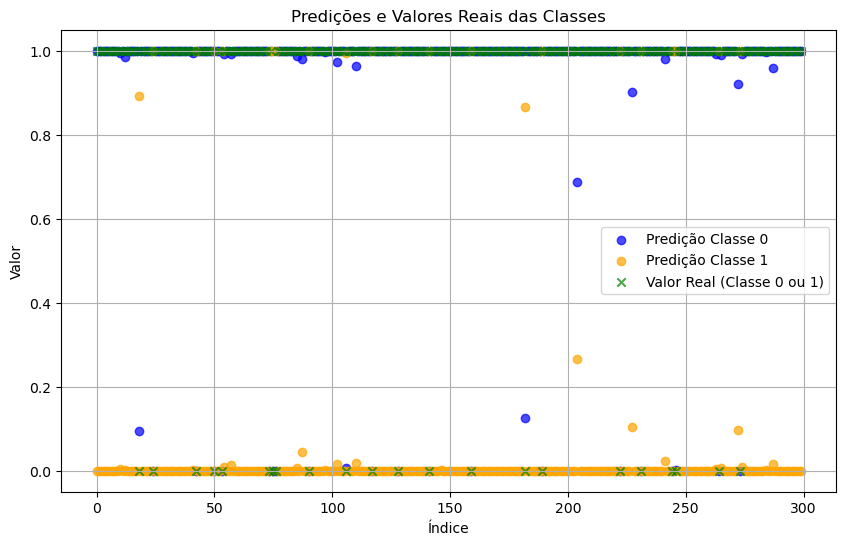

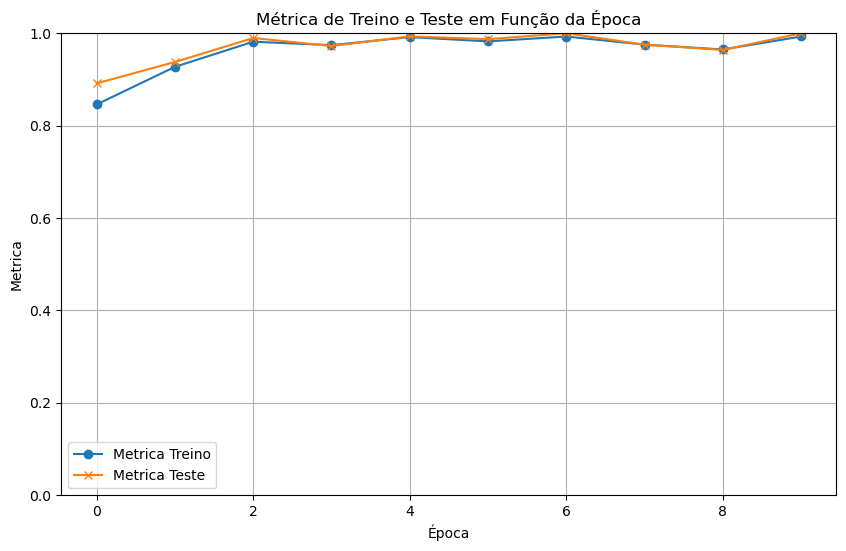

Roc Score Area under the curve: 1.0


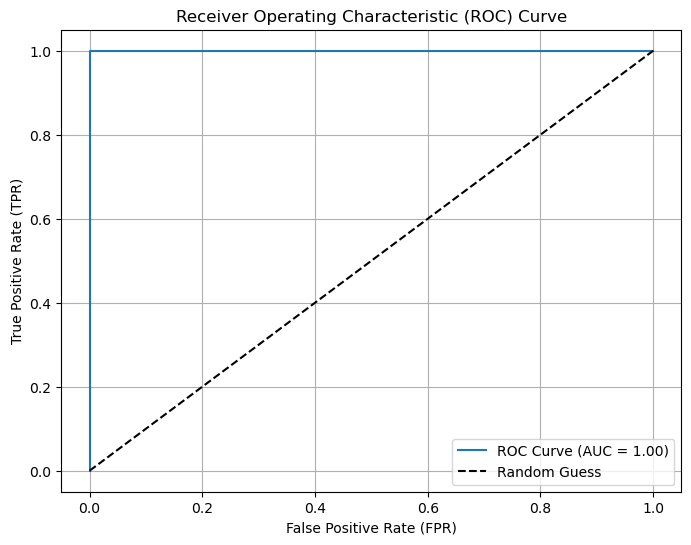

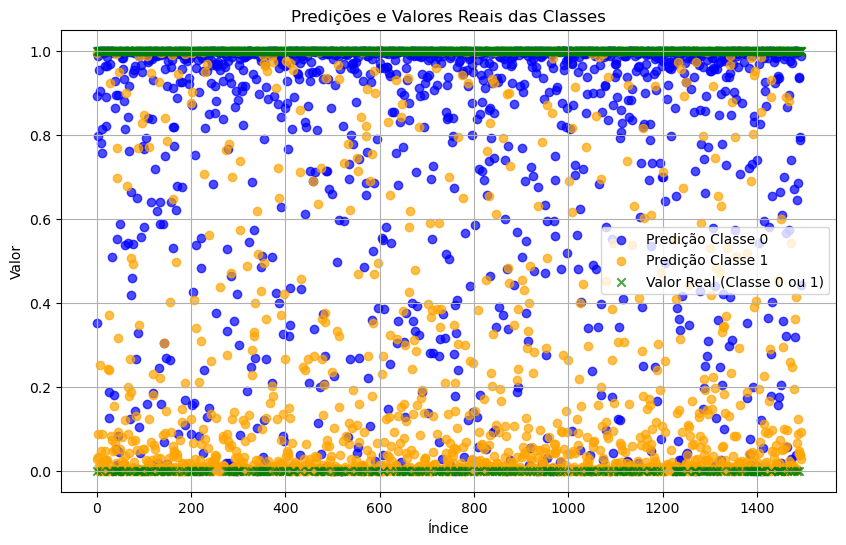

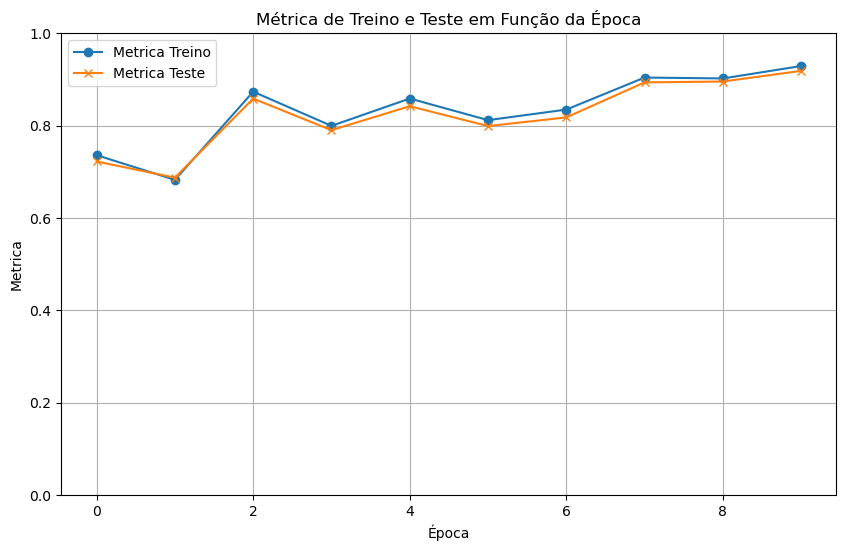

Roc Score Area under the curve: 0.9368722327640733


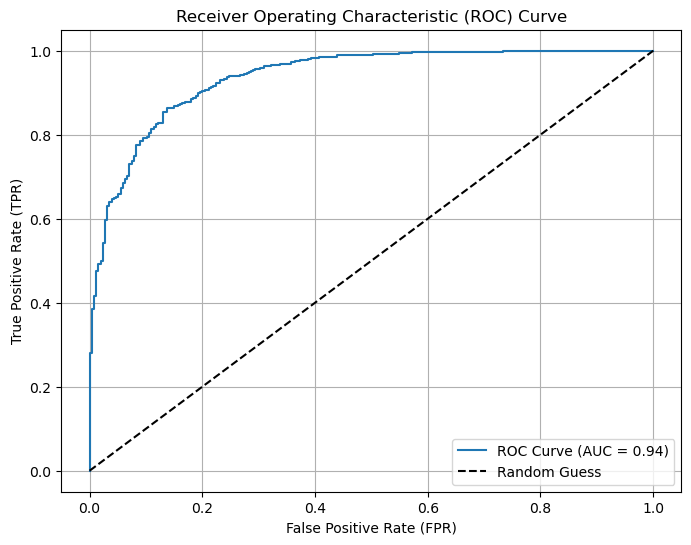

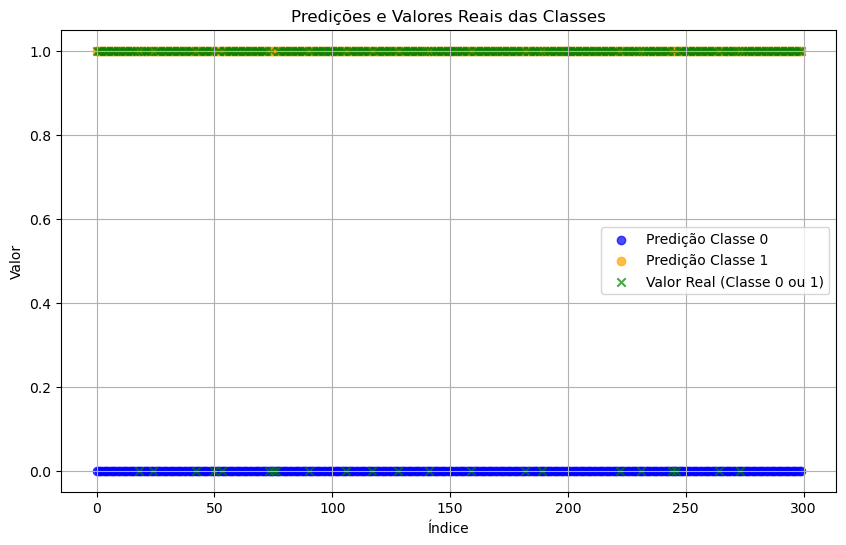

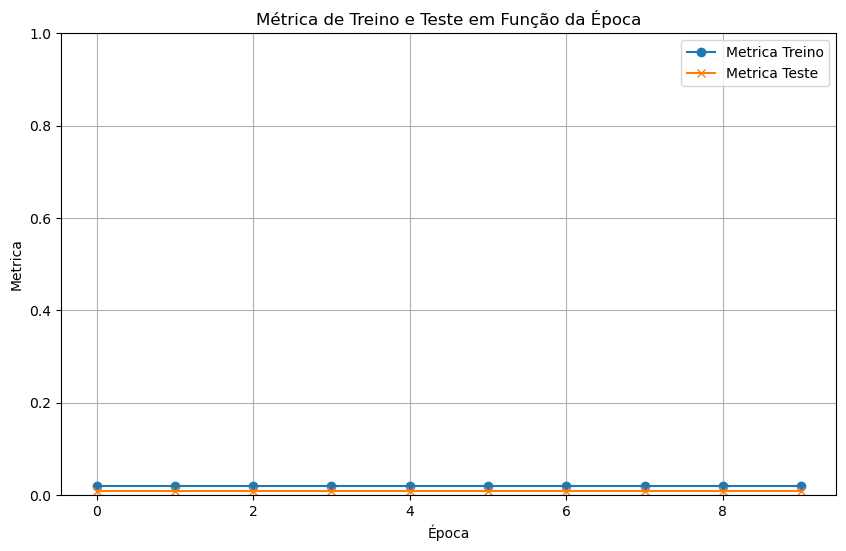

Roc Score Area under the curve: 0.5


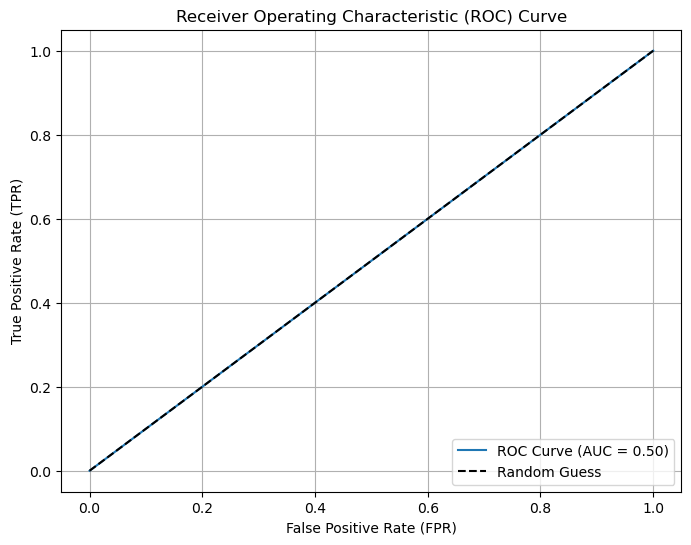

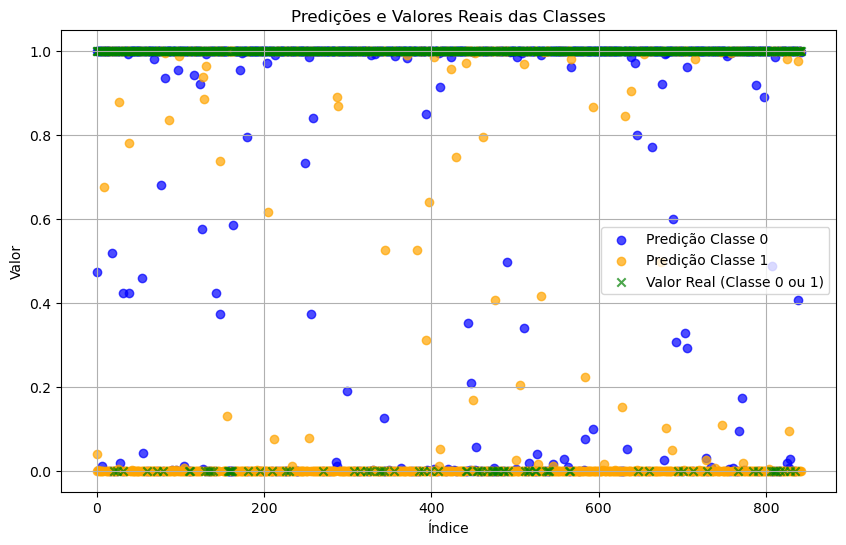

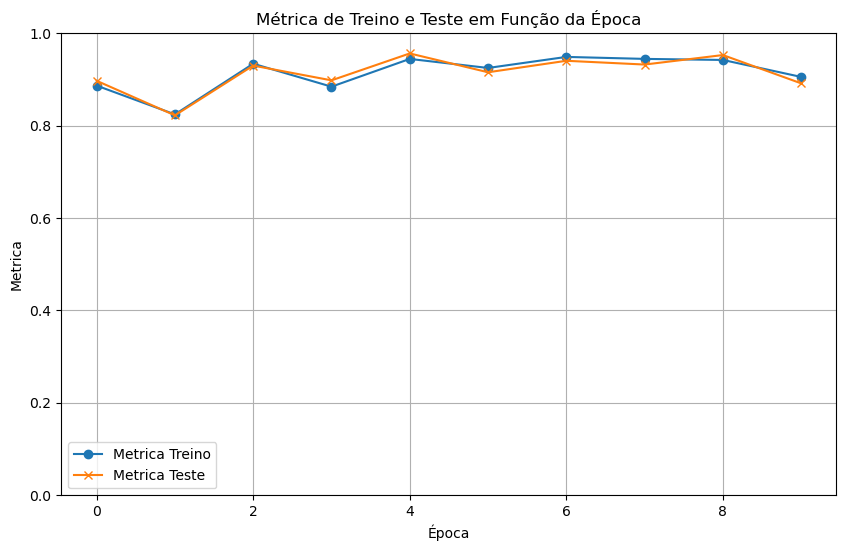

Roc Score Area under the curve: 0.9737871406024841


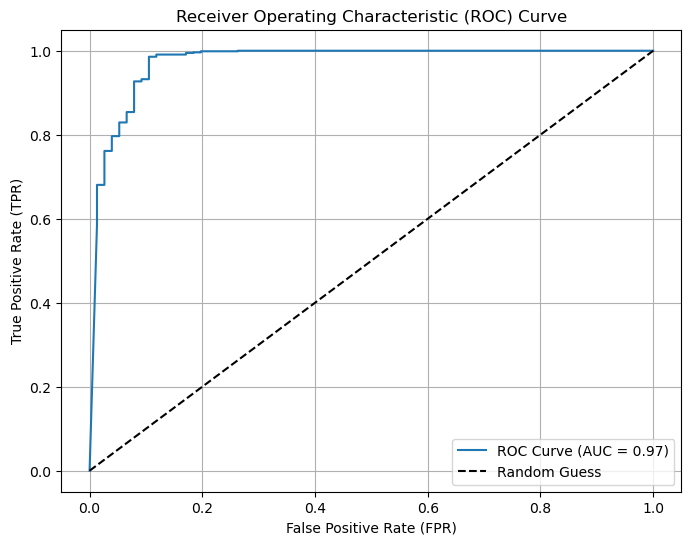

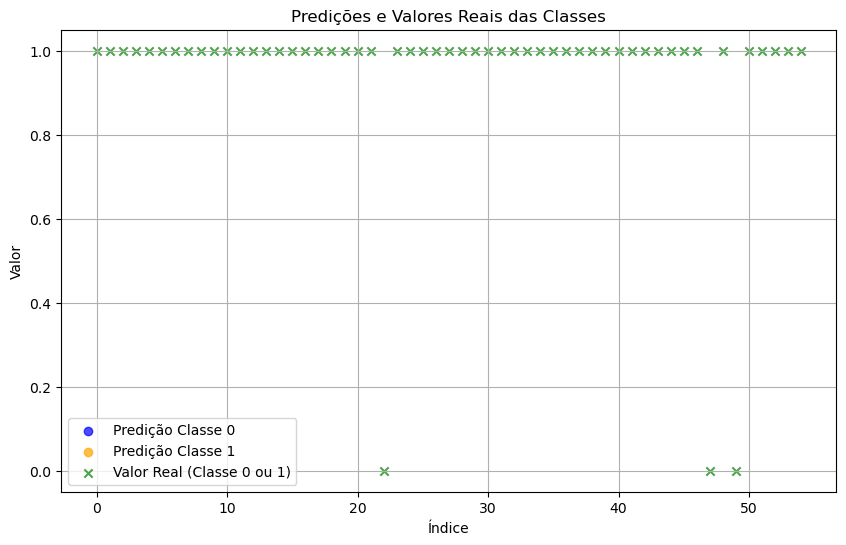

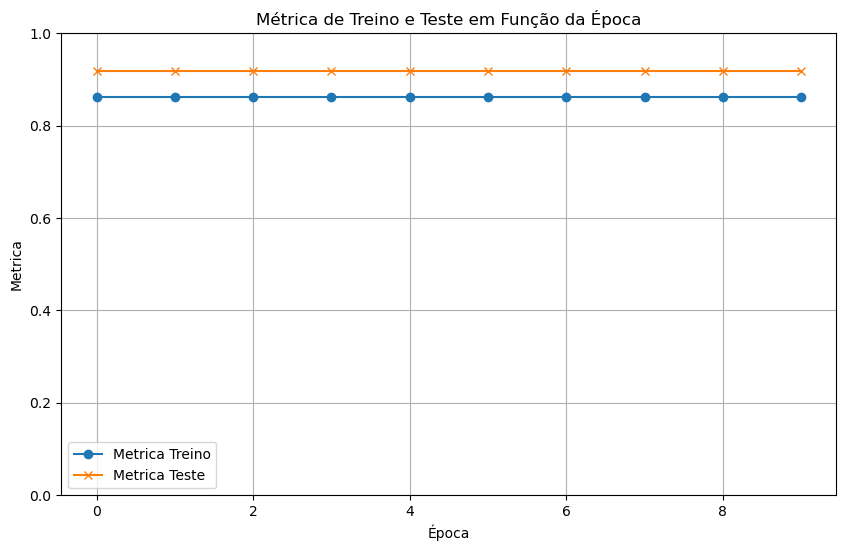

Erro ao plotar para o modelo: Input contains NaN.


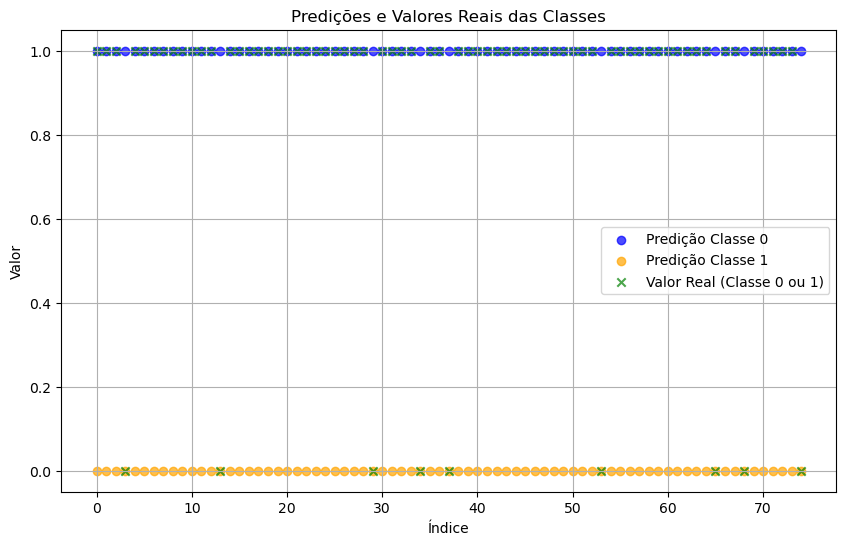

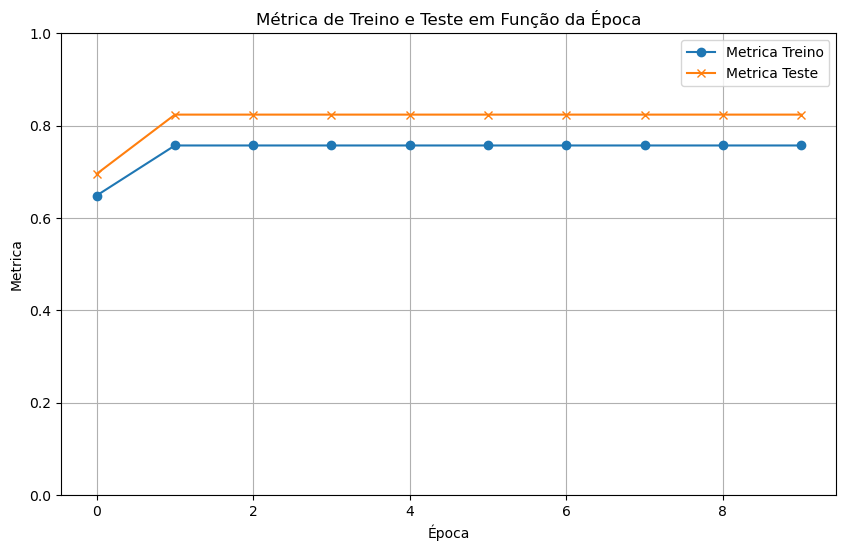

Roc Score Area under the curve: 0.5


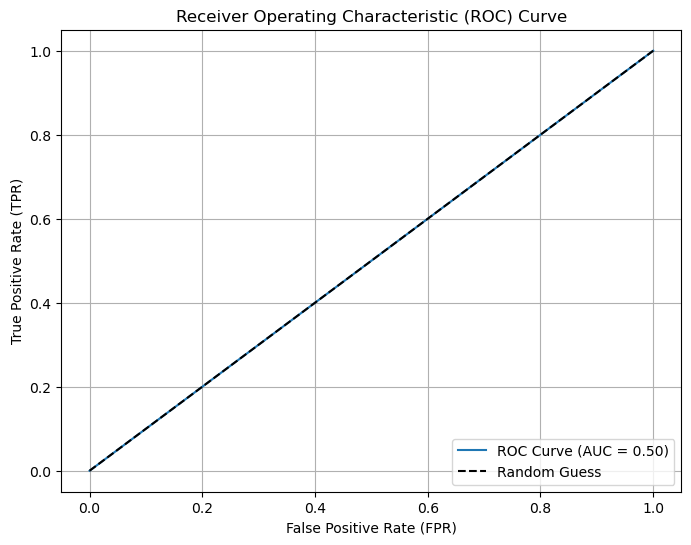

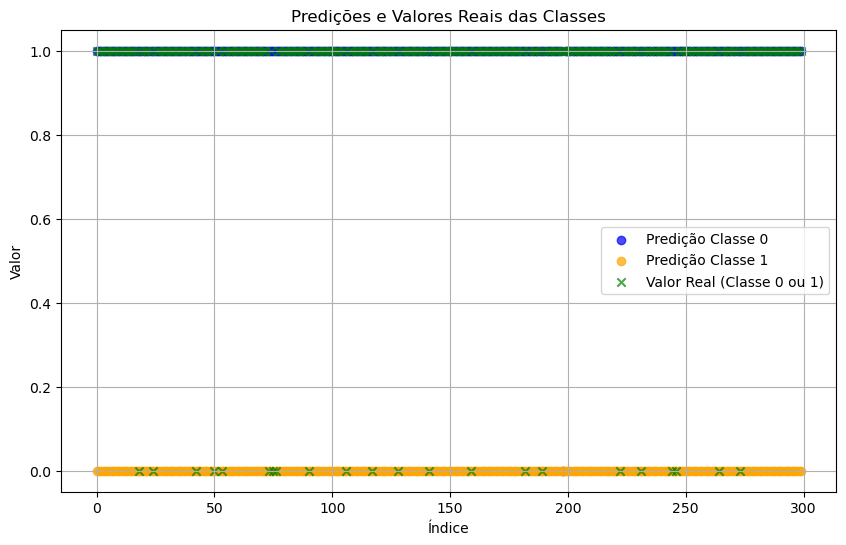

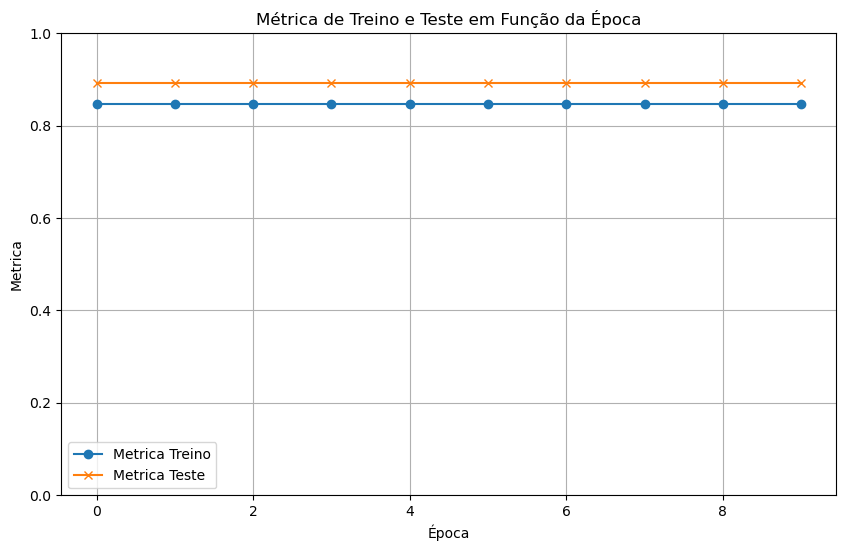

Roc Score Area under the curve: 0.4982014388489209


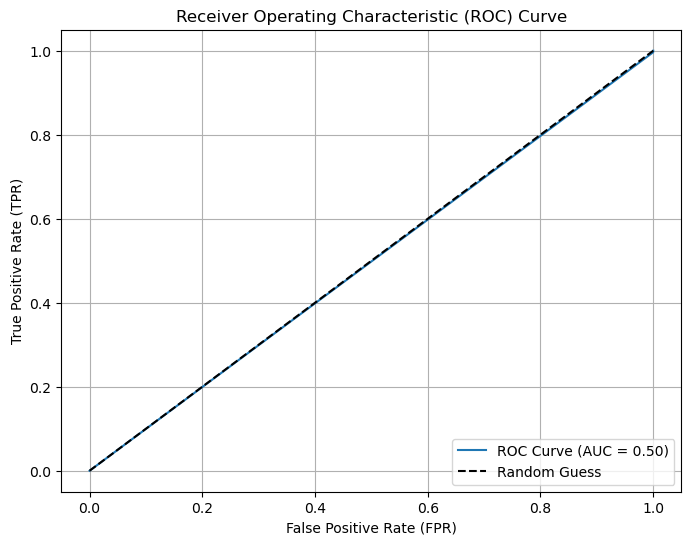

In [37]:
for modelo in modelos:
    try:
        plot_predictions(modelo, modelo.X_test, modelo.y_test)
        plot_metric(modelo)
        plot_roc_curve(modelo, modelo.X_test, modelo.y_test)
        # Salvar o modelo
    except Exception as e:
        print(f"Erro ao plotar para o modelo: {e}")
        continue

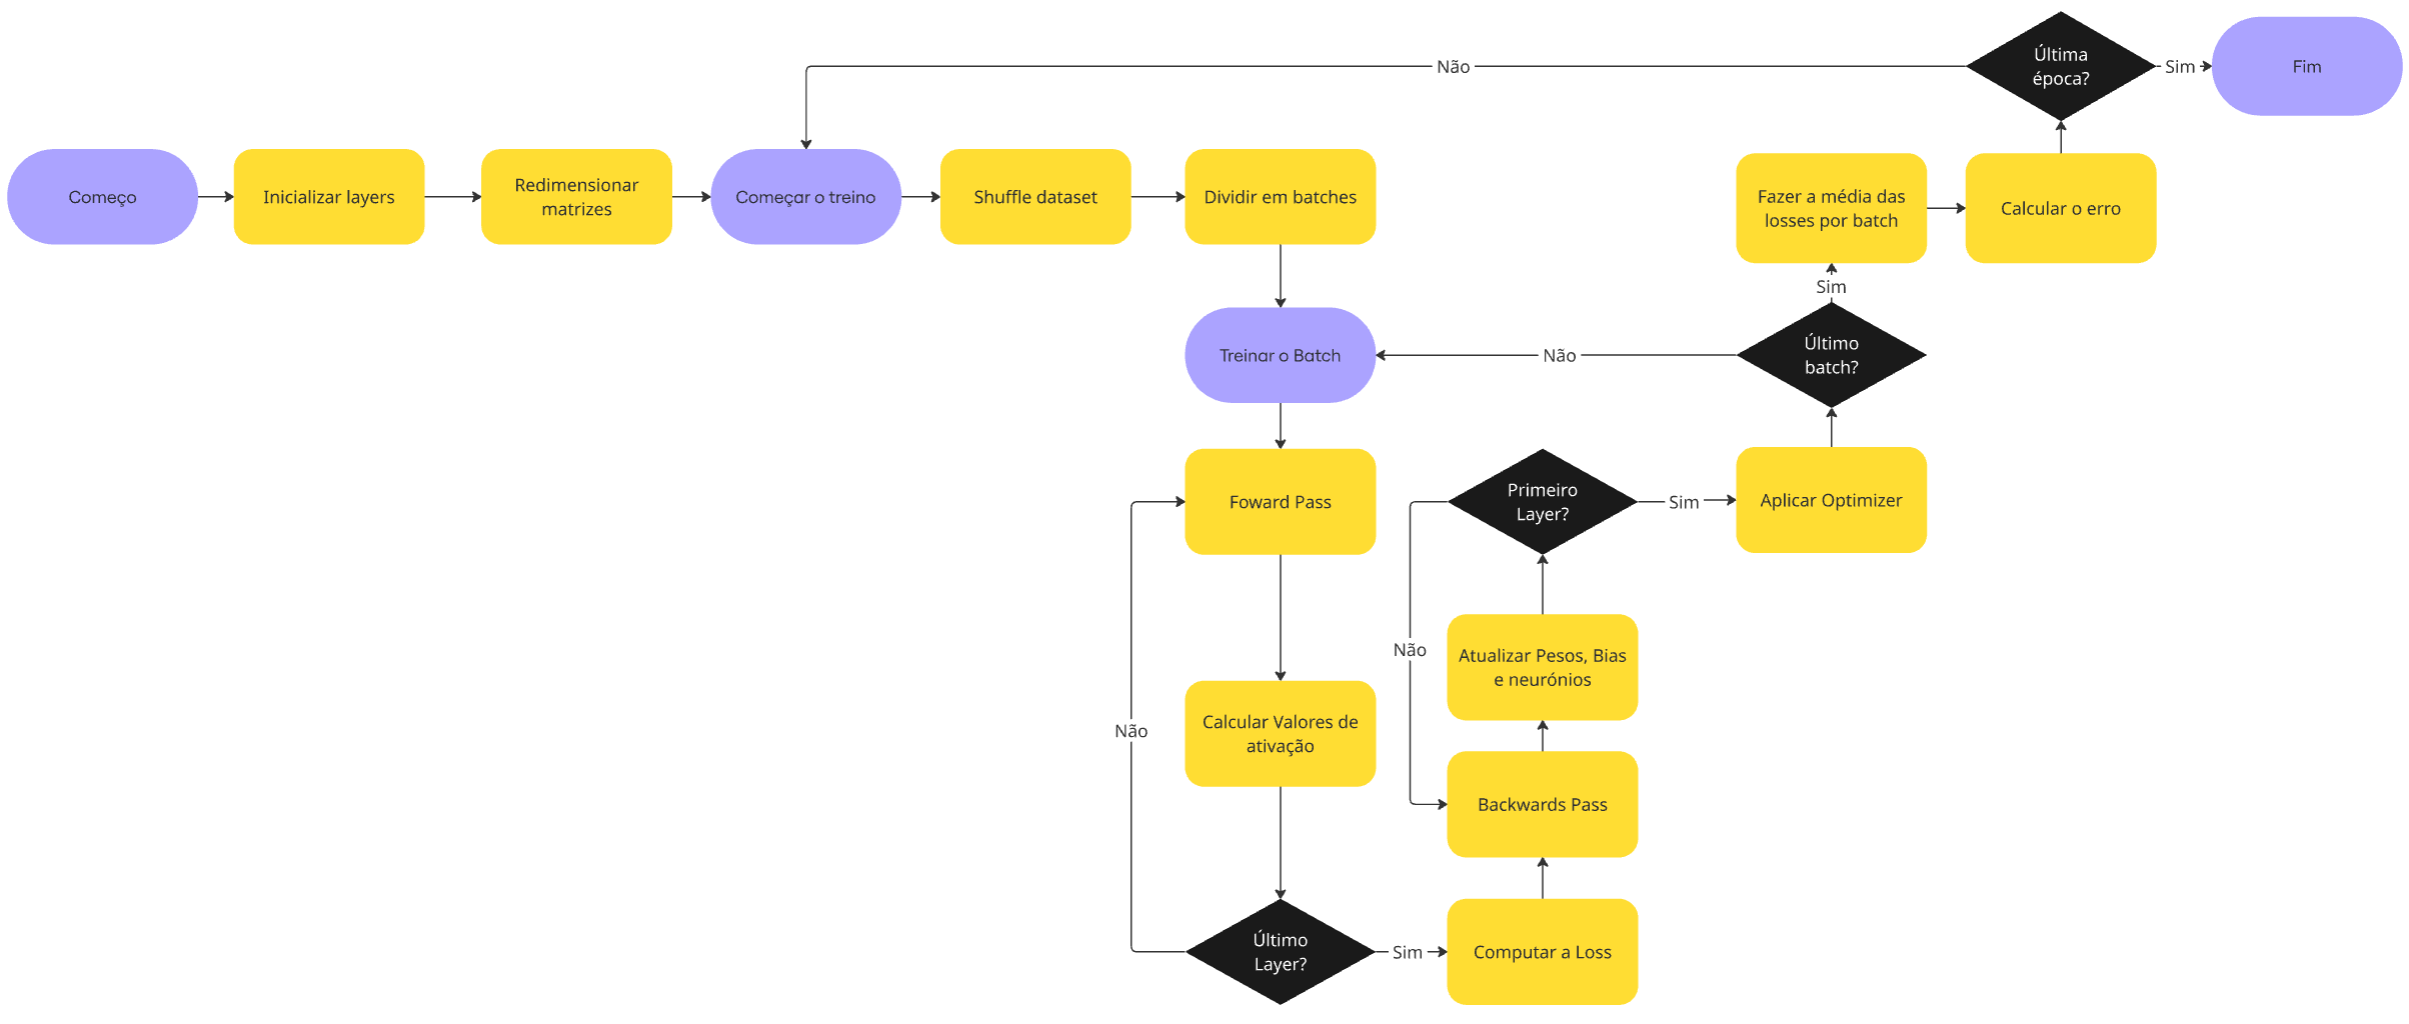

In [38]:
from IPython.display import Image, display

# Caminho para a imagem
image_path = os.path.join(cwd, "diagram.png")

# Exibir a imagem
display(Image(filename=image_path))

# Melhorias no Projeto

## O que falta?

- **Finalizar o notebook**: Consolidar todo o código e análises em um formato limpo e apresentável.
- **Melhorar as benchmarks**: Refazer testes, comparar resultados e extrair estatísticas importantes (como accuracy, recall, F1-score, etc.).
- **Aplicar ideias de otimização**:
  - Implementar funções de `weighted losses` para balancear classes desbalanceadas.
  - Ajustar o `batch size` e o número de `épocas` de forma específica para cada dataset.
- **Aprimorar a regularização**:
  - Adicionar camadas de `Dropout`? Se estiver a produzir overfitting.
  - Incluir `L2 Regularization` nos pesos das redes neurais.
- **Limpar o diretório**: existem muitos ficheiros dispensáveis que nao sao utilizados 
## Propostas de mudança. Falar com o professor 

- **Eliminação de alguns datasets**: Avaliar a remoção de datasets que contenham muitos valores faltantes (`missing values`).
- **Conversão de tipos de dados**:
  - Alterar colunas `float` para `int` onde for apropriado.
---

